# Week 3
Untuk Screenshot Token bisa dilihat disini: https://drive.google.com/drive/folders/1_L-nP3cMxt_2AXuElvZMexdvmx8Xt6IZ?usp=sharing
## 1. Data AUC.csv

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

from feature_engine.encoding import OneHotEncoder
from feature_engine.imputation import ArbitraryNumberImputer, MeanMedianImputer, CategoricalImputer
from feature_engine.encoding import RareLabelEncoder

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from feature_engine.encoding import (
    OneHotEncoder,
    CountFrequencyEncoder,
    MeanEncoder,
    OrdinalEncoder,
    WoEEncoder,
)

In [316]:
df_auc = pd.read_csv('dataset/AUC.csv')
df_auc.head(15)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
5,The Hunger Games: Special Edition,Writtenby:SuzanneCollins,Narratedby:TatianaMaslany,10 hrs and 35 mins,30-10-18,English,5 out of 5 stars72 ratings,656.00
6,Quest for the Diamond Sword,Writtenby:WinterMorgan,Narratedby:LukeDaniels,2 hrs and 23 mins,25-11-14,English,5 out of 5 stars11 ratings,233.00
7,The Dark Prophecy,Writtenby:RickRiordan,Narratedby:RobbieDaymond,12 hrs and 32 mins,02-05-17,English,5 out of 5 stars50 ratings,820.00
8,Merlin Mission Collection,Writtenby:MaryPopeOsborne,Narratedby:MaryPopeOsborne,10 hrs and 56 mins,02-05-17,English,5 out of 5 stars5 ratings,"1,256.00"
9,The Tyrant’s Tomb,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 22 mins,24-09-19,English,5 out of 5 stars58 ratings,820.00


In [317]:
def check_data(df):
    print(f"There are {df.isna().sum().sum()} missing values in the dataset.")
    print(f"There are {df.duplicated().sum()} duplicated values in the dataset.")

check_data(df_auc)

There are 0 missing values in the dataset.
There are 0 duplicated values in the dataset.


**TODO**:
- Fixing & Removing unnecessary format:
    - Removing:
        - "Writtenby:" in `author` column.
        - "Narratedby:" in `narrator` column.
    - Fixing:
        - Add space between two or more word blocks in `author` and `narrator` columns.
- Turn `Time` column into a minute of duration instead
- Convert some column with corrected data type:
    - Turn `Time` column into a minute of duration instead.
    - Turn `price` column into float instead.
- Turn `release-date` into a pandas datetime format.
- Fix `stars` column by:
    - Adding a new column called `rating` containing how many ratings are there.
    - Fix the stars rating format.

1. Fixing & Removing unnecessary format:


In [318]:
# Removing:
# - "Writtenby:" in `author` column
# - "Narratedby:" in `narrator` column

df_auc['author'] = df_auc['author'].str.replace('Writtenby:', '', regex=False)
df_auc['narrator'] = df_auc['narrator'].str.replace('Narratedby:', '', regex=False)

df_auc.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


In [319]:
# Fixing:
# - Add space between two or more word blocks in `author` and `narrator` columns
df_auc['author'] = df_auc['author'].str.replace(pat = r"(\w)([A-Z])", repl = r"\1 \2", regex = True)
df_auc['narrator'] = df_auc['narrator'].str.replace(pat = r"(\w)([A-Z])", repl = r"\1 \2", regex = True)

df_auc.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Geronimo Stilton,Bill Lobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Rick Riordan,Robbie Daymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Jeff Kinney,Dan Russell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Rick Riordan,Soneela Nankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,Jesse Bernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


In [320]:
df_auc = pd.concat([df_auc['name'], 
                            #splits author into author1, author2 and author3.
                            df_auc['author'].str.split(',', expand = True).add_prefix('author'),
                            df_auc.loc[:,['narrator', 'time', 'releasedate', 'language', 'stars', 'price']]], 
                            axis = 1)

# adding "None" to author 1, 2, 3 if there's no author (missing values)
df_auc[['author1', 'author2', 'author3']] = df_auc[['author1', 'author2', 'author3']].fillna('No Author')

df_auc.head()

,name,author0,author1,author2,author3,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Geronimo Stilton,No Author,No Author,No Author,Bill Lobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Rick Riordan,No Author,No Author,No Author,Robbie Daymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Jeff Kinney,No Author,No Author,No Author,Dan Russell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Rick Riordan,No Author,No Author,No Author,Soneela Nankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,No Author,No Author,No Author,Jesse Bernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


In [321]:
df_auc.sample(5, random_state=6)

,name,author0,author1,author2,author3,narrator,time,releasedate,language,stars,price
8407,Night of the New Magicians,Mary Pope Osborne,No Author,No Author,No Author,Mary Pope Osborne,1 hr and 17 mins,13-03-06,English,5 out of 5 stars1 rating,301.00
11786,Is Everyone Really Equal?,Özlem Sensoy,Robin Di Angelo,No Author,No Author,Kirsten Potter,10 hrs and 58 mins,30-03-21,English,Not rated yet,703.00
71037,Slayed by Darkness,Alexandra Ivy,No Author,No Author,No Author,Tanya Eby,2 hrs and 41 mins,29-06-21,English,Not rated yet,352.00
1004,The Princess in Black and the Science Fair Scare,Shannon Hale,Dean Hale,No Author,No Author,Julia Whelan,18 mins,25-09-18,English,Not rated yet,352.00
71202,Ravaged,Elisabeth Naughton,No Author,No Author,No Author,Elizabeth Wiley,5 hrs and 1 min,26-01-16,English,Not rated yet,668.00


In [322]:
df_auc.author0.value_counts()

author0
矢島雅弘                   874
Smart Reading          405
中西貴之                   311
div.                   276
William Shakespeare    242
                      ... 
Gillian Riley            1
John Elmore              1
Ralf Herter              1
Ulrike Wolpers           1
Stephen O'Shea           1
Name: count, Length: 44839, dtype: int64

In [323]:
df_auc.author1.value_counts()

author1
No Author             73762
石橋遊                     874
B J                     311
Mark Victor Hansen       65
Yannick Esters           65
                      ...  
Paul Reilly               1
Sean Callahan             1
Doug Fletcher             1
Marylou Tyler             1
Hamish Hamilton           1
Name: count, Length: 9157, dtype: int64

In [324]:
df_auc.author2.value_counts()

author2
No Author                   85135
Twin Sisters                   19
Amy Newmark                    14
Amy Newmark-editor             12
Pauline Verduzier               9
                            ...  
James Wood                      1
Johan Rockström-foreword        1
Jeffrey F.Ma                    1
John P.Kotter                   1
Agneta Cras                     1
Name: count, Length: 1999, dtype: int64

In [325]:
df_auc.author3.value_counts()

author3
No Author    86713
               776
Name: count, dtype: int64

Apparently there's no author in `author3`, let's remove the column


In [326]:
df_auc.drop('author3', axis=1, inplace=True)
df_auc.head(3)

,name,author0,author1,author2,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Geronimo Stilton,No Author,No Author,Bill Lobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Rick Riordan,No Author,No Author,Robbie Daymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Jeff Kinney,No Author,No Author,Dan Russell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00


2. Turn `Time` column into a minute of duration instead

In [327]:
# Function to convert 'time' to minutes
def time_to_minutes(time_str):
    # Use regular expressions to extract hours and minutes
    hours_match = re.search(r'(\d+) hrs', time_str)
    minutes_match = re.search(r'(\d+) mins', time_str)
    
    hours = int(hours_match.group(1)) if hours_match else 0
    minutes = int(minutes_match.group(1)) if minutes_match else 0
    
    return hours * 60 + minutes

# Apply the function to the 'time' column
df_auc['duration_in_minutes'] = df_auc['time'].apply(time_to_minutes)

df_auc.drop('time', axis=1, inplace=True)

df_auc.head()

,name,author0,author1,author2,narrator,releasedate,language,stars,price,duration_in_minutes
0,Geronimo Stilton #11 & #12,Geronimo Stilton,No Author,No Author,Bill Lobely,04-08-08,English,5 out of 5 stars34 ratings,468.00,140
1,The Burning Maze,Rick Riordan,No Author,No Author,Robbie Daymond,01-05-18,English,4.5 out of 5 stars41 ratings,820.00,788
2,The Deep End,Jeff Kinney,No Author,No Author,Dan Russell,06-11-20,English,4.5 out of 5 stars38 ratings,410.00,123
3,Daughter of the Deep,Rick Riordan,No Author,No Author,Soneela Nankani,05-10-21,English,4.5 out of 5 stars12 ratings,615.00,676
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,No Author,No Author,Jesse Bernstein,13-01-10,English,4.5 out of 5 stars181 ratings,820.00,600


3. Convert some column with corrected data type

In [328]:
# releasedate
df_auc['releasedate'] = pd.to_datetime(df_auc['releasedate'], format = '%d-%m-%y')

df_auc.head(2)

,name,author0,author1,author2,narrator,releasedate,language,stars,price,duration_in_minutes
0,Geronimo Stilton #11 & #12,Geronimo Stilton,No Author,No Author,Bill Lobely,2008-08-04,English,5 out of 5 stars34 ratings,468.00,140
1,The Burning Maze,Rick Riordan,No Author,No Author,Robbie Daymond,2018-05-01,English,4.5 out of 5 stars41 ratings,820.00,788


In [329]:
df_auc.price.value_counts()

price
586.00      5533
668.00      4262
703.00      3588
836.00      2704
820.00      2458
            ... 
2,631.00       1
2,764.00       1
895.00         1
364.00         1
544.00         1
Name: count, Length: 1011, dtype: int64

In [330]:
print(f'There are: {len(df_auc[df_auc["price"] == "Free"])} free books') # apparently there are 338 free books

There are: 338 free books


In [331]:
# replace Free with 0
df_auc['price'] = df_auc['price'].str.replace('Free', '0')

# removing commas (,) from price
df_auc['price'] = df_auc['price'].str.replace(',', '')

# convert to float
df_auc['price'] = df_auc['price'].astype(float)

In [332]:
df_auc.sample(3)

,name,author0,author1,author2,narrator,releasedate,language,stars,price,duration_in_minutes
46214,Sacrifice the One,Monica P.Carter,No Author,No Author,Katherine Dollison,2019-12-11,English,Not rated yet,820.0,550
14155,Off Camera,Ted Koppel,No Author,No Author,Ted Koppel,2000-10-03,English,Not rated yet,603.0,311
84007,Want to Go Private?,Sarah Darer Littman,No Author,No Author,Amanda Dolan,2020-03-31,English,Not rated yet,586.0,530


In [333]:
df_auc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   name                 87489 non-null  object        
 1   author0              87489 non-null  object        
 2   author1              87489 non-null  object        
 3   author2              87489 non-null  object        
 4   narrator             87489 non-null  object        
 5   releasedate          87489 non-null  datetime64[ns]
 6   language             87489 non-null  object        
 7   stars                87489 non-null  object        
 8   price                87489 non-null  float64       
 9   duration_in_minutes  87489 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 6.7+ MB


FIx `stars` column

In [334]:
df_auc.stars.value_counts()

stars
Not rated yet                    72417
5 out of 5 stars1 rating          3739
4 out of 5 stars1 rating          1254
5 out of 5 stars2 ratings          998
4.5 out of 5 stars2 ratings        661
                                 ...  
3.5 out of 5 stars61 ratings         1
5 out of 5 stars321 ratings          1
5 out of 5 stars93 ratings           1
4.5 out of 5 stars747 ratings        1
4 out of 5 stars76 ratings           1
Name: count, Length: 665, dtype: int64

In [335]:
# turn stars into rating_stars and total_rating
df_auc[['rating_stars_out_of_5', 'total_rating']] = df_auc['stars'].str.split('stars', expand=True)
df_auc['total_rating'] = df_auc['total_rating'].str.replace('out of', '/')


# removing "rating" text from total_rating with emtpy string
df_auc['total_rating'] = df_auc['total_rating'].str.replace(' ratings', '')

df_auc.drop('stars', axis=1, inplace=True)

In [336]:
df_auc.sample(5, random_state=42)

,name,author0,author1,author2,narrator,releasedate,language,price,duration_in_minutes,rating_stars_out_of_5,total_rating
34975,Die Armada der Irren,Jens Fischer Rodrian,No Author,No Author,Allyson Voller,2022-03-28,german,468.0,290,Not rated yet,None
50744,A Man Without Breath,Philip Kerr,No Author,No Author,Jonathan Keeble,2022-03-03,English,873.0,895,Not rated yet,None
22107,Crashing Through,Robert Kurson,No Author,No Author,Doug Ordunio,2007-04-30,English,1005.0,612,5 out of 5,1 rating
7759,Nate the Great and the Earth Day Robot,Andrew Sharmat,No Author,No Author,John Lavelle,2021-05-25,English,100.0,24,Not rated yet,None
43690,Annabel,Kathleen Winter,No Author,No Author,Laurence Bouvard,2011-06-10,English,752.0,704,Not rated yet,None


In [337]:
df_auc.total_rating.value_counts()

total_rating
1 rating    5822
2           2315
3           1207
4            857
5            535
            ... 
5,500          1
536            1
287            1
2,236          1
126            1
Name: count, Length: 384, dtype: int64

In [338]:
check_data(df_auc)

There are 72417 missing values in the dataset.
There are 1 duplicated values in the dataset.


In [339]:
# changing "1 rating" into 1
df_auc['total_rating'] = df_auc['total_rating'].str.replace('1 rating', '1')
df_auc.sample(5, random_state=42)

,name,author0,author1,author2,narrator,releasedate,language,price,duration_in_minutes,rating_stars_out_of_5,total_rating
34975,Die Armada der Irren,Jens Fischer Rodrian,No Author,No Author,Allyson Voller,2022-03-28,german,468.0,290,Not rated yet,None
50744,A Man Without Breath,Philip Kerr,No Author,No Author,Jonathan Keeble,2022-03-03,English,873.0,895,Not rated yet,None
22107,Crashing Through,Robert Kurson,No Author,No Author,Doug Ordunio,2007-04-30,English,1005.0,612,5 out of 5,1
7759,Nate the Great and the Earth Day Robot,Andrew Sharmat,No Author,No Author,John Lavelle,2021-05-25,English,100.0,24,Not rated yet,None
43690,Annabel,Kathleen Winter,No Author,No Author,Laurence Bouvard,2011-06-10,English,752.0,704,Not rated yet,None


In [340]:
df_auc['rating_stars_out_of_5'].value_counts()

rating_stars_out_of_5
Not rated yet    72417
5 out of 5        6761
4.5 out of 5      4046
4 out of 5        2729
3 out of 5         711
3.5 out of 5       413
2 out of 5         182
1 out of 5         175
2.5 out of 5        47
1.5 out of 5         8
Name: count, dtype: int64

In [341]:
# replacing 'Not rated yet' with 0 in `rating_stars_out_of_5`
df_auc['rating_stars_out_of_5'] = df_auc['rating_stars_out_of_5'].str.replace('Not rated yet', '0')

# removing "out of 5" in `rating_stars_out_of_5` and convert to float datatype
df_auc['rating_stars_out_of_5'] = df_auc['rating_stars_out_of_5'].str.replace('out of 5', '').astype('float') 

In [342]:
# removing commas from total_rating
df_auc['total_rating'] = df_auc['total_rating'].str.replace(',', '')

# fill missing value with 0
df_auc['total_rating'] = df_auc['total_rating'].fillna(0)

# convert to int
df_auc['total_rating'] = df_auc['total_rating'].astype('int64')

In [343]:
# checking the missing values again
df_auc.isna().sum()


name                     0
author0                  0
author1                  0
author2                  0
narrator                 0
releasedate              0
language                 0
price                    0
duration_in_minutes      0
rating_stars_out_of_5    0
total_rating             0
dtype: int64

In [344]:
df_auc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   87489 non-null  object        
 1   author0                87489 non-null  object        
 2   author1                87489 non-null  object        
 3   author2                87489 non-null  object        
 4   narrator               87489 non-null  object        
 5   releasedate            87489 non-null  datetime64[ns]
 6   language               87489 non-null  object        
 7   price                  87489 non-null  float64       
 8   duration_in_minutes    87489 non-null  int64         
 9   rating_stars_out_of_5  87489 non-null  float64       
 10  total_rating           87489 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 7.3+ MB


In [345]:
df_auc.head()

,name,author0,author1,author2,narrator,releasedate,language,price,duration_in_minutes,rating_stars_out_of_5,total_rating
0,Geronimo Stilton #11 & #12,Geronimo Stilton,No Author,No Author,Bill Lobely,2008-08-04,English,468.0,140,5.0,34
1,The Burning Maze,Rick Riordan,No Author,No Author,Robbie Daymond,2018-05-01,English,820.0,788,4.5,41
2,The Deep End,Jeff Kinney,No Author,No Author,Dan Russell,2020-11-06,English,410.0,123,4.5,38
3,Daughter of the Deep,Rick Riordan,No Author,No Author,Soneela Nankani,2021-10-05,English,615.0,676,4.5,12
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,No Author,No Author,Jesse Bernstein,2010-01-13,English,820.0,600,4.5,181


In [346]:
check_data(df_auc)

There are 0 missing values in the dataset.
There are 1 duplicated values in the dataset.


In [347]:
df_auc.isna().sum()

name                     0
author0                  0
author1                  0
author2                  0
narrator                 0
releasedate              0
language                 0
price                    0
duration_in_minutes      0
rating_stars_out_of_5    0
total_rating             0
dtype: int64

In [348]:
# find  the duplicated rows
df_auc[df_auc.duplicated(keep=False)]

,name,author0,author1,author2,narrator,releasedate,language,price,duration_in_minutes,rating_stars_out_of_5,total_rating
14322,London,Peter Ackroyd,No Author,No Author,Simon Callow,2005-11-02,English,410.0,180,0.0,0
39603,London,Peter Ackroyd,No Author,No Author,Simon Callow,2005-11-02,English,410.0,180,0.0,0


In [349]:
df_auc = df_auc.drop_duplicates()
check_data(df_auc)

There are 0 missing values in the dataset.
There are 0 duplicated values in the dataset.


In [350]:
df_auc.head()

,name,author0,author1,author2,narrator,releasedate,language,price,duration_in_minutes,rating_stars_out_of_5,total_rating
0,Geronimo Stilton #11 & #12,Geronimo Stilton,No Author,No Author,Bill Lobely,2008-08-04,English,468.0,140,5.0,34
1,The Burning Maze,Rick Riordan,No Author,No Author,Robbie Daymond,2018-05-01,English,820.0,788,4.5,41
2,The Deep End,Jeff Kinney,No Author,No Author,Dan Russell,2020-11-06,English,410.0,123,4.5,38
3,Daughter of the Deep,Rick Riordan,No Author,No Author,Soneela Nankani,2021-10-05,English,615.0,676,4.5,12
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,No Author,No Author,Jesse Bernstein,2010-01-13,English,820.0,600,4.5,181


In [351]:
df_auc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87488 entries, 0 to 87488
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   87488 non-null  object        
 1   author0                87488 non-null  object        
 2   author1                87488 non-null  object        
 3   author2                87488 non-null  object        
 4   narrator               87488 non-null  object        
 5   releasedate            87488 non-null  datetime64[ns]
 6   language               87488 non-null  object        
 7   price                  87488 non-null  float64       
 8   duration_in_minutes    87488 non-null  int64         
 9   rating_stars_out_of_5  87488 non-null  float64       
 10  total_rating           87488 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 8.0+ MB


In [352]:
df_auc.columns

Index(['name', 'author0', 'author1', 'author2', 'narrator', 'releasedate',
       'language', 'price', 'duration_in_minutes', 'rating_stars_out_of_5',
       'total_rating'],
      dtype='object')

In [353]:
df_auc2 = df_auc.copy()
num_cols = [var for var in df_auc2.columns if df_auc2[var].dtypes != 'O']

df_auc2 = df_auc2[num_cols]

df_auc2.to_csv('clean_dataset/clean_auc2.csv', index=False)

TODO NEXT:
- Add hour and minute from duration in minutes

In [354]:
clean_df_auc = df_auc.copy()
clean_df_auc = clean_df_auc[['name', 'author0', 'author1',
                            'author2', 'narrator', 'duration_in_minutes',
                            'releasedate', 'language', 'rating_stars_out_of_5',
                            'total_rating', 'price']]

clean_df_auc

,name,author0,author1,author2,narrator,duration_in_minutes,releasedate,language,rating_stars_out_of_5,total_rating,price
0,Geronimo Stilton #11 & #12,Geronimo Stilton,No Author,No Author,Bill Lobely,140,2008-08-04,English,5.0,34,468.0
1,The Burning Maze,Rick Riordan,No Author,No Author,Robbie Daymond,788,2018-05-01,English,4.5,41,820.0
2,The Deep End,Jeff Kinney,No Author,No Author,Dan Russell,123,2020-11-06,English,4.5,38,410.0
3,Daughter of the Deep,Rick Riordan,No Author,No Author,Soneela Nankani,676,2021-10-05,English,4.5,12,615.0
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,No Author,No Author,Jesse Bernstein,600,2010-01-13,English,4.5,181,820.0
...,...,...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Chris Stewart,No Author,No Author,Chris Stewart,454,2017-03-09,English,0.0,0,596.0
87485,The Alps,Stephen O'Shea,No Author,No Author,Robert Fass,607,2017-02-21,English,0.0,0,820.0
87486,The Innocents Abroad,Mark Twain,No Author,No Author,Flo Gibson,1144,2016-12-30,English,0.0,0,938.0
87487,A Sentimental Journey,Laurence Sterne,No Author,No Author,Anton Lesser,248,2011-02-23,English,0.0,0,680.0


In [355]:
# submit our clean dataset
clean_df_auc.to_csv('clean_dataset/clean_auc.csv', index=False)

Data for ML

In [356]:
df_auc2 = clean_df_auc.copy()
df_auc2.head()

,name,author0,author1,author2,narrator,duration_in_minutes,releasedate,language,rating_stars_out_of_5,total_rating,price
0,Geronimo Stilton #11 & #12,Geronimo Stilton,No Author,No Author,Bill Lobely,140,2008-08-04,English,5.0,34,468.0
1,The Burning Maze,Rick Riordan,No Author,No Author,Robbie Daymond,788,2018-05-01,English,4.5,41,820.0
2,The Deep End,Jeff Kinney,No Author,No Author,Dan Russell,123,2020-11-06,English,4.5,38,410.0
3,Daughter of the Deep,Rick Riordan,No Author,No Author,Soneela Nankani,676,2021-10-05,English,4.5,12,615.0
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,No Author,No Author,Jesse Bernstein,600,2010-01-13,English,4.5,181,820.0


Dropping unnecessary columns

In [357]:
cols = ['name', 'author0', 'author1', 'author2', 'narrator']

df_auc2.drop(cols, axis=1, inplace=True)\

print(df_auc2.columns)
df_auc2.head()

Index(['duration_in_minutes', 'releasedate', 'language',
       'rating_stars_out_of_5', 'total_rating', 'price'],
      dtype='object')


,duration_in_minutes,releasedate,language,rating_stars_out_of_5,total_rating,price
0,140,2008-08-04,English,5.0,34,468.0
1,788,2018-05-01,English,4.5,41,820.0
2,123,2020-11-06,English,4.5,38,410.0
3,676,2021-10-05,English,4.5,12,615.0
4,600,2010-01-13,English,4.5,181,820.0


In [358]:
# extract year, month, and day into new columns
df_auc2['release_year'] = df_auc2['releasedate'].dt.year
df_auc2['release_month'] = df_auc2['releasedate'].dt.month
df_auc2['release_day'] = df_auc2['releasedate'].dt.day

# drop original column
df_auc2 = df_auc2.drop('releasedate', axis=1)

# reorder:
df_auc2 = df_auc2[['duration_in_minutes', 'release_year', 'release_month', 'release_day', 'language', 'rating_stars_out_of_5',
                   'total_rating', 'price']]

df_auc2.head()

,duration_in_minutes,release_year,release_month,release_day,language,rating_stars_out_of_5,total_rating,price
0,140,2008,8,4,English,5.0,34,468.0
1,788,2018,5,1,English,4.5,41,820.0
2,123,2020,11,6,English,4.5,38,410.0
3,676,2021,10,5,English,4.5,12,615.0
4,600,2010,1,13,English,4.5,181,820.0


Variable Encoding:
Method used for encoding is `Label Encoding`

In [359]:
X_train, X_test, y_train, y_test = train_test_split(
    df_auc2.iloc[:,:-1],
    df_auc2['price'],
    test_size=0.2,
    random_state=0
)

X_train.shape, X_test.shape

((69990, 7), (17498, 7))

In [360]:
encoder = OrdinalEncoder(
    encoding_method='arbitrary',
    variables=['language']
)

encoder.fit(X_train)

X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

X_train.head()

,duration_in_minutes,release_year,release_month,release_day,language,rating_stars_out_of_5,total_rating
32941,569,2021,7,13,0,0.0,0
29017,26,2021,6,24,1,0.0,0
24483,452,2011,7,7,0,0.0,0
10955,618,2014,5,13,0,5.0,1
85101,237,2020,9,9,2,0.0,0


In [361]:
encoder.encoder_dict_

{'language': {'English': 0,
  'japanese': 1,
  'german': 2,
  'russian': 3,
  'spanish': 4,
  'italian': 5,
  'catalan': 6,
  'danish': 7,
  'greek': 8,
  'french': 9,
  'swedish': 10,
  'portuguese': 11,
  'Hindi': 12,
  'urdu': 13,
  'finnish': 14,
  'tamil': 15,
  'polish': 16,
  'romanian': 17,
  'icelandic': 18,
  'norwegian': 19,
  'czech': 20,
  'mandarin_chinese': 21,
  'hungarian': 22,
  'dutch': 23,
  'bulgarian': 24,
  'turkish': 25,
  'afrikaans': 26,
  'arabic': 27,
  'korean': 28,
  'galician': 29,
  'hebrew': 30,
  'basque': 31,
  'slovene': 32,
  'telugu': 33,
  'ukrainian': 34}}

Apply Feature Scaling

In [362]:
# Apply normaization
sc_X = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

sc_y = MinMaxScaler()
y_train = sc_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = sc_y.transform(y_test.values.reshape(-1, 1))

In [363]:
# combine X_train and X_test into a dataframe

X_train = pd.DataFrame(X_train, columns=df_auc2.columns[:-1])
X_test = pd.DataFrame(X_test, columns=df_auc2.columns[:-1])

X_train['price'] = y_train
X_test['price'] = y_test

combined_auc = pd.concat([X_train, X_test], axis=0)
combined_auc

,duration_in_minutes,release_year,release_month,release_day,language,rating_stars_out_of_5,total_rating,price
0,0.066201,0.851852,0.545455,0.400000,0.000000,0.0,0.00000,0.081412
1,0.003025,0.851852,0.454545,0.766667,0.029412,0.0,0.00000,0.116282
2,0.052589,0.481481,0.545455,0.200000,0.000000,0.0,0.00000,0.091136
3,0.071902,0.592593,0.363636,0.400000,0.000000,1.0,0.00008,0.116143
4,0.027574,0.814815,0.727273,0.266667,0.058824,0.0,0.00000,0.023062
...,...,...,...,...,...,...,...,...
17493,0.034904,0.888889,0.181818,0.300000,0.117647,0.0,0.00000,0.069742
17494,0.033624,0.777778,0.181818,0.200000,0.000000,0.0,0.00000,0.079050
17495,0.004770,0.703704,0.272727,0.200000,0.000000,0.0,0.00000,0.032370
17496,0.023851,0.666667,0.636364,1.000000,0.000000,0.0,0.00000,0.048764


<Axes: ylabel='price'>

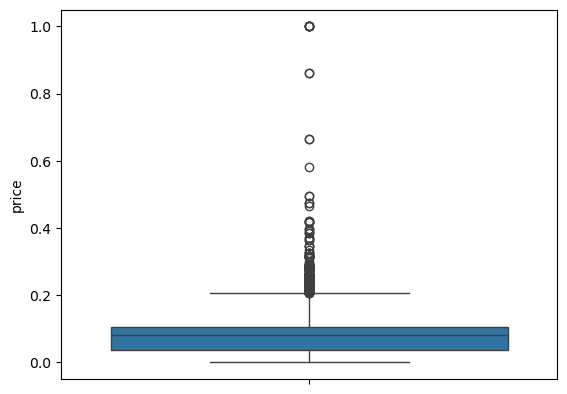

In [364]:
sns.boxplot(combined_auc.price)

In [365]:
def detect_outliers(series, multiplier=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return (series < lower_bound) | (series > upper_bound)

def remove_outliers(df, target_col, multiplier=1.5):
    # Detect outliers in the target variable
    outlier_mask = detect_outliers(df[target_col], multiplier)
    
    # Filter out rows with outliers in the target variable
    df_cleaned = df[~outlier_mask]
    
    return df_cleaned

In [366]:
combined_auc = remove_outliers(combined_auc, 'price')

<Axes: ylabel='price'>

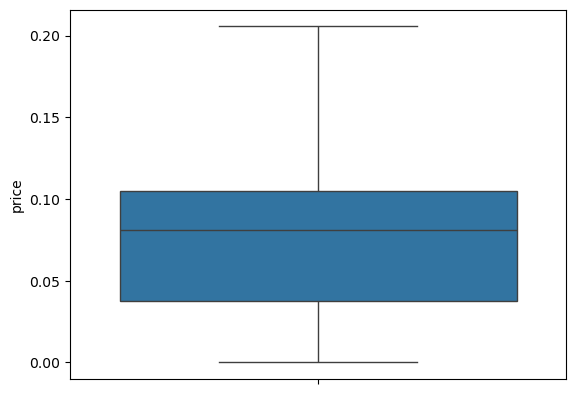

In [367]:
sns.boxplot(combined_auc.price)

In [368]:
combined_auc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86784 entries, 0 to 17497
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   duration_in_minutes    86784 non-null  float64
 1   release_year           86784 non-null  float64
 2   release_month          86784 non-null  float64
 3   release_day            86784 non-null  float64
 4   language               86782 non-null  float64
 5   rating_stars_out_of_5  86784 non-null  float64
 6   total_rating           86784 non-null  float64
 7   price                  86784 non-null  float64
dtypes: float64(8)
memory usage: 6.0 MB


In [369]:
combined_auc.isna().sum()

duration_in_minutes      0
release_year             0
release_month            0
release_day              0
language                 2
rating_stars_out_of_5    0
total_rating             0
price                    0
dtype: int64

In [370]:
combined_auc.duplicated().sum()

4756

In [371]:
# dropping missing and duplicated values
combined_auc.dropna(inplace=True)
combined_auc.drop_duplicates(inplace=True)

check_data(combined_auc)

There are 0 missing values in the dataset.
There are 0 duplicated values in the dataset.


In [372]:
combined_auc.to_csv('clean_dataset/clean_auc.csv', index=False)

## 2. Data CHN.csv

In [373]:
df_chn = pd.read_csv('dataset/CHN.csv')
df_chn.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,4,9237-HQITU,Female,0.0,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [374]:
df_chn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11234 entries, 0 to 11233
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        11234 non-null  int64 
 1   customerID        11234 non-null  object
 2   gender            11234 non-null  object
 3   SeniorCitizen     9508 non-null   object
 4   Partner           11234 non-null  object
 5   Dependents        11234 non-null  object
 6   tenure            9526 non-null   object
 7   PhoneService      11234 non-null  object
 8   MultipleLines     11234 non-null  object
 9   InternetService   11234 non-null  object
 10  OnlineSecurity    11234 non-null  object
 11  OnlineBackup      11234 non-null  object
 12  DeviceProtection  11234 non-null  object
 13  TechSupport       11234 non-null  object
 14  StreamingTV       11234 non-null  object
 15  StreamingMovies   11234 non-null  object
 16  Contract          11234 non-null  object
 17  PaperlessBil

**TODO**:
- Corrected some feature data types
- Drop unnecessary columns
- Check missing & duplicated values
- Outliers Handling
- Encode variables (after splitting between train & test set):
    - Target: Label Encoding
    - Feature: Basic vs Monotonic encoding method <br>
    *NOTE*: Compare model performance with other encoding method
- Feature Scaling


Corrected some feature data types

In [375]:
col = ['tenure', 'MonthlyCharges', 'TotalCharges']

# replacing '-' and ' ' with 0
df_chn[col] = df_chn[col].replace('-', '0').replace(' ', '0')

# convert to float
df_chn[col] = df_chn[col].astype('float')

df_chn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11234 entries, 0 to 11233
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        11234 non-null  int64  
 1   customerID        11234 non-null  object 
 2   gender            11234 non-null  object 
 3   SeniorCitizen     9508 non-null   object 
 4   Partner           11234 non-null  object 
 5   Dependents        11234 non-null  object 
 6   tenure            9526 non-null   float64
 7   PhoneService      11234 non-null  object 
 8   MultipleLines     11234 non-null  object 
 9   InternetService   11234 non-null  object 
 10  OnlineSecurity    11234 non-null  object 
 11  OnlineBackup      11234 non-null  object 
 12  DeviceProtection  11234 non-null  object 
 13  TechSupport       11234 non-null  object 
 14  StreamingTV       11234 non-null  object 
 15  StreamingMovies   11234 non-null  object 
 16  Contract          11234 non-null  object

In [376]:
cat_cols = [var for var in df_chn.columns if df_chn[var].dtypes == 'O']

# check unique value of each cat_cols
for col in cat_cols:
    print(f"{col} : {df_chn[col].unique()}")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : ['0.0' nan '1.0' ... '0.009966377061848697' '0.9913752572613183'
 '0.0018739479537013093']
Partner : ['Yes' 'No' 'yEs']
Dependents : ['No' 'Yes' 'yeS' 'no']
PhoneService : ['No' 'Yes' 'yEs' 'no']
MultipleLines : ['No phone service' 'No' 'Yes' 'no' 'yeS']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service' 'yeS' 'no']
OnlineBackup : ['Yes' 'No' 'No internet service' 'yeS']
DeviceProtection : ['No' 'Yes' 'No internet service' 'yeS' 'no']
TechSupport : ['No' 'Yes' 'no' 'No internet service' 'yEs']
StreamingTV : ['No' 'Yes' 'No internet service' 'nO' 'yEs']
StreamingMovies : ['No' 'Yes' 'No internet service' 'yeS' 'no']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No' 'yEs']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automat

In [377]:
# Turning "nO",  "yeS", "yEs", "no" into "No" & "Yes" in cat_cols

df_chn = df_chn.replace({'nO': 'No',
                         'yeS': 'Yes',
                         'yEs': 'Yes',
                         'no': 'No'})
# check unique value of each cat_cols
for col in cat_cols:
    print(f"{col} : {df_chn[col].unique()}")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : ['0.0' nan '1.0' ... '0.009966377061848697' '0.9913752572613183'
 '0.0018739479537013093']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Dropping unnecessary columns

In [378]:
df_chn.drop(['Unnamed: 0', 'customerID'], axis=1, inplace=True)
df_chn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Check missing & duplicated values

In [379]:
check_data(df_chn)

There are 5150 missing values in the dataset.
There are 6 duplicated values in the dataset.


Removing duplicated values

In [380]:
# dropping duplicated values
df_chn = df_chn.drop_duplicates()

Handling missing values

In [381]:
# split into train and test set
X = df_chn.drop(['Churn'], axis=1)
y = df_chn['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

((7859, 19), (3369, 19))

In [382]:
X_train.isna().sum()

gender                 0
SeniorCitizen       1198
Partner                0
Dependents             0
tenure              1183
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges      1175
TotalCharges           0
dtype: int64

In [383]:
X_test.isna().sum()

gender                0
SeniorCitizen       528
Partner               0
Dependents            0
tenure              525
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges      541
TotalCharges          0
dtype: int64

In [384]:
# Apparently there are 3 columns with too many missing values, lets remove them
X_train = X_train.drop(['SeniorCitizen', 'tenure', 'MonthlyCharges'], axis=1)
X_test = X_test.drop(['SeniorCitizen', 'tenure', 'MonthlyCharges'], axis=1)

In [385]:
X_train.isna().sum()

gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
TotalCharges        0
dtype: int64

In [386]:
X_test.isna().sum()

gender              0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
TotalCharges        0
dtype: int64

Outliers Handling:

In [387]:
num_cols = [var for var in X_train.columns if X_train[var].dtypes != 'O']
num_cols

['TotalCharges']

<Axes: ylabel='TotalCharges'>

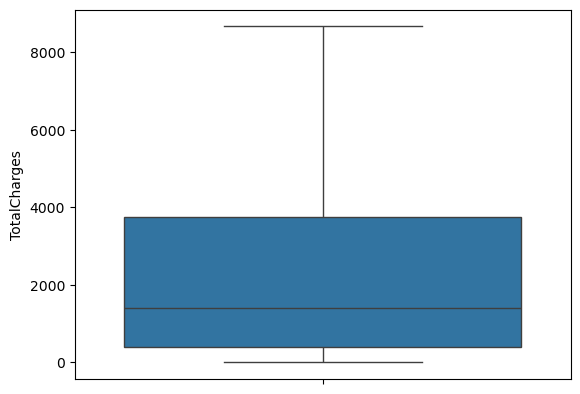

In [388]:
sns.boxplot(X_train['TotalCharges'])

<Axes: ylabel='TotalCharges'>

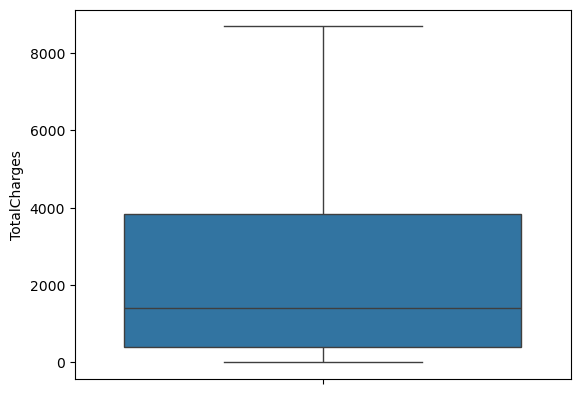

In [389]:
sns.boxplot(X_test['TotalCharges'])

Encode variables: *Basic Encoding*

In [390]:
# FOR TARGET VARIABLE, USE LABEL ENCODING
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

y_train.shape, y_test.shape

((7859,), (3369,))

In [391]:
# One hot encoding
enc = OneHotEncoder()

X_train_ohe = enc.fit_transform(X_train)
X_test_ohe = enc.transform(X_test)

X_train_ohe.shape, X_test_ohe.shape

((7859, 42), (3369, 42))

In [392]:
# Count encoding
enc = CountFrequencyEncoder()

X_train_count = enc.fit_transform(X_train)
X_test_count = enc.transform(X_test)

X_train_count.shape, X_test_count.shape

((7859, 16), (3369, 16))

Encode variables: *Monotonic Encoding*

In [393]:
# Mean Integer Encoding
enc = MeanEncoder()

X_train_mean = enc.fit_transform(X_train, y_train)
X_test_mean = enc.transform(X_test)

X_train_mean.shape, X_test_mean.shape

((7859, 16), (3369, 16))

In [394]:
# Ordered Integer Encoding
enc = OrdinalEncoder()

X_train_ordered = enc.fit_transform(X_train, y_train)
X_test_ordered = enc.transform(X_test)

X_train_ordered.shape, X_test_ordered.shape

((7859, 16), (3369, 16))

In [395]:
# Weight of evidence
enc = WoEEncoder()

X_train_woe = enc.fit_transform(X_train, y_train)
X_test_woe = enc.transform(X_test)

X_train_woe.shape, X_test_woe.shape

((7859, 16), (3369, 16))

Logistic Regression Performance

In [396]:
def run_logistic(X_train, X_test, y_train, y_test):

    # function to train and test the performance of logistic regression
    logit = LogisticRegression(random_state=42)
    logit.fit(X_train, y_train)

    print("Train set")
    pred = logit.predict_proba(X_train)
    print("Logistic Regression roc-auc: {}".format(roc_auc_score(y_train, pred[:, 1])))

    print("Test set")
    pred = logit.predict_proba(X_test)
    print("Logistic Regression roc-auc: {}".format(roc_auc_score(y_test, pred[:, 1])))

In [397]:
print('One Hot Encoding roc-auc score (Logistic Regression):')
run_logistic(X_train_ohe, X_test_ohe, y_train, y_test)

One Hot Encoding roc-auc score (Logistic Regression):
Train set
Logistic Regression roc-auc: 0.8433268185894837
Test set
Logistic Regression roc-auc: 0.8305944485384426


In [398]:
print('Count Encoding roc-auc score (Logistic Regression):')
run_logistic(X_train_count, X_test_count, y_train, y_test)

Count Encoding roc-auc score (Logistic Regression):
Train set
Logistic Regression roc-auc: 0.8389340359048483
Test set
Logistic Regression roc-auc: 0.8281858129315758


In [399]:
print('Mean Encoding roc-auc score (Logistic Regression):')
run_logistic(X_train_mean, X_test_mean, y_train, y_test)

Mean Encoding roc-auc score (Logistic Regression):
Train set
Logistic Regression roc-auc: 0.8391917370724541
Test set
Logistic Regression roc-auc: 0.8300567701083545
Logistic Regression roc-auc: 0.8300567701083545


In [400]:
print('Ordinal Encoding roc-auc score (Logistic Regression):')
run_logistic(X_train_ordered, X_test_ordered, y_train, y_test)

Ordinal Encoding roc-auc score (Logistic Regression):
Train set
Logistic Regression roc-auc: 0.8280326791666737
Test set
Logistic Regression roc-auc: 0.8196634733480718


In [401]:
print('Weight of Evidence Encoding roc-auc score (Logistic Regression):')
run_logistic(X_train_woe, X_test_woe, y_train, y_test)

Weight of Evidence Encoding roc-auc score (Logistic Regression):
Train set
Logistic Regression roc-auc: 0.8403173602919772
Test set
Logistic Regression roc-auc: 0.8305162076839798


One Hot Encoding & WoE Encoding have the highest score on the test set for this dataset

Feature Scaling

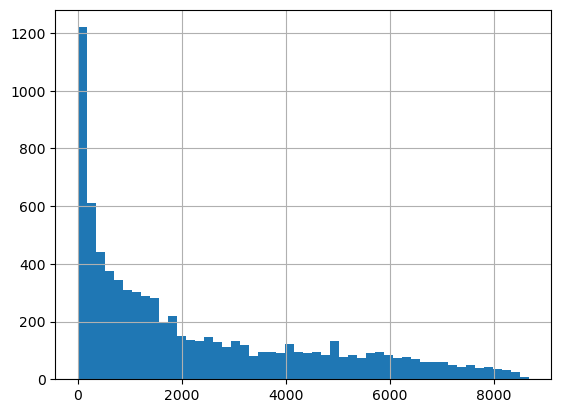

In [402]:
X_train_ohe['TotalCharges'].hist(bins=50);

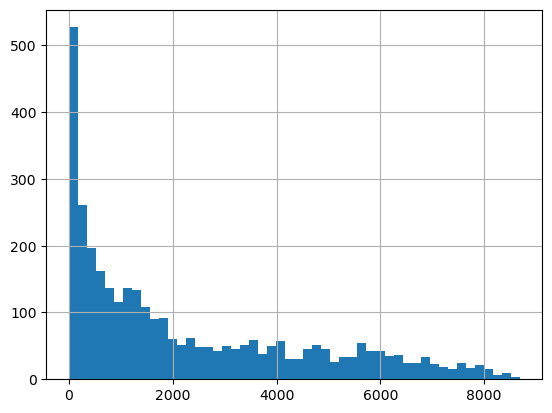

In [403]:
X_test_ohe['TotalCharges'].hist(bins=50);

Use min Max Scaler because it's not in normal distribution

In [404]:
X_train_ohe.head(3)

,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_Yes,Dependents_No,PhoneService_Yes,PhoneService_No,MultipleLines_No,...,StreamingMovies_No,Contract_One year,Contract_Month-to-month,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Electronic check,PaymentMethod_Credit card (automatic)
7975,270.60,1,0,1,0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
7650,5293.95,0,1,0,1,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
8862,612.10,1,0,0,1,0,1,1,0,1,...,1,0,1,0,0,1,0,0,1,0


In [405]:
X_train_scale = X_train_woe.copy()
X_test_scale = X_test_woe.copy()

scaler = MinMaxScaler()

# scale totalCharges only
X_train_scale['TotalCharges'] = scaler.fit_transform(X_train_scale['TotalCharges'].values.reshape(-1, 1))
X_test_scale['TotalCharges'] = scaler.transform(X_test_scale['TotalCharges'].values.reshape(-1, 1))

X_train_scale.shape, X_test_scale.shape

((7859, 16), (3369, 16))

In [406]:
X_train_scale.head(3)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
7975,0.022983,0.293898,-0.714323,0.017098,-0.083609,-1.537207,-1.537207,-1.537207,-1.537207,-1.537207,-1.537207,-1.537207,-1.052855,-0.621655,-0.388726,0.031202
7650,-0.022554,-0.364836,-0.714323,0.017098,0.124019,-0.426509,0.680278,-0.279726,-0.215910,-0.724094,0.363262,0.162988,-1.052855,0.335600,-0.620943,0.610433
8862,0.022983,-0.364836,0.237943,0.017098,-0.083609,-0.426509,0.680278,-0.279726,0.571041,0.692830,0.363262,0.348999,0.739166,0.335600,0.812059,0.070580


In [407]:
# combine X_scale with y into dataframe
X_train_scale['Churn'] = y_train
X_test_scale['Churn'] = y_test

X_train_scale.shape, X_test_scale.shape

((7859, 17), (3369, 17))

In [408]:
# concat into 1 dataframe again
combined_df = pd.concat([X_train_scale, X_test_scale], axis=0)
combined_df

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
7975,0.022983,0.293898,-0.714323,0.017098,-0.083609,-1.537207,-1.537207,-1.537207,-1.537207,-1.537207,-1.537207,-1.537207,-1.052855,-0.621655,-0.388726,0.031202,0
7650,-0.022554,-0.364836,-0.714323,0.017098,0.124019,-0.426509,0.680278,-0.279726,-0.215910,-0.724094,0.363262,0.162988,-1.052855,0.335600,-0.620943,0.610433,1
8862,0.022983,-0.364836,0.237943,0.017098,-0.083609,-0.426509,0.680278,-0.279726,0.571041,0.692830,0.363262,0.348999,0.739166,0.335600,0.812059,0.070580,0
578,-0.022554,-0.364836,0.237943,0.017098,0.124019,0.698100,-0.711706,-0.279726,0.571041,0.692830,0.363262,0.162988,0.739166,0.335600,0.812059,0.388056,0
6954,-0.022554,0.293898,0.237943,0.017098,-0.083609,-1.537207,-1.537207,-1.537207,-1.537207,-1.537207,-1.537207,-1.537207,0.739166,0.335600,-0.388726,0.035676,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4456,0.022983,-0.364836,0.237943,0.017098,0.124019,-1.537207,-1.537207,-1.537207,-1.537207,-1.537207,-1.537207,-1.537207,-2.673984,0.335600,-0.702082,0.186210,0
9465,0.022983,-0.364836,-0.714323,0.017098,-0.083609,-0.426509,-0.711706,-0.279726,-0.215910,0.692830,0.363262,0.162988,-2.673984,-0.621655,-0.702082,0.563647,0
473,-0.022554,-0.364836,0.237943,0.017098,-0.083609,-0.426509,-0.711706,0.615266,0.571041,-0.724094,0.363262,0.348999,0.739166,-0.621655,-0.388726,0.151670,0
6555,-0.022554,0.293898,0.237943,0.017098,-0.083609,-1.537207,-1.537207,-1.537207,-1.537207,-1.537207,-1.537207,-1.537207,-1.052855,-0.621655,-0.388726,0.047420,0


Outliers Checking

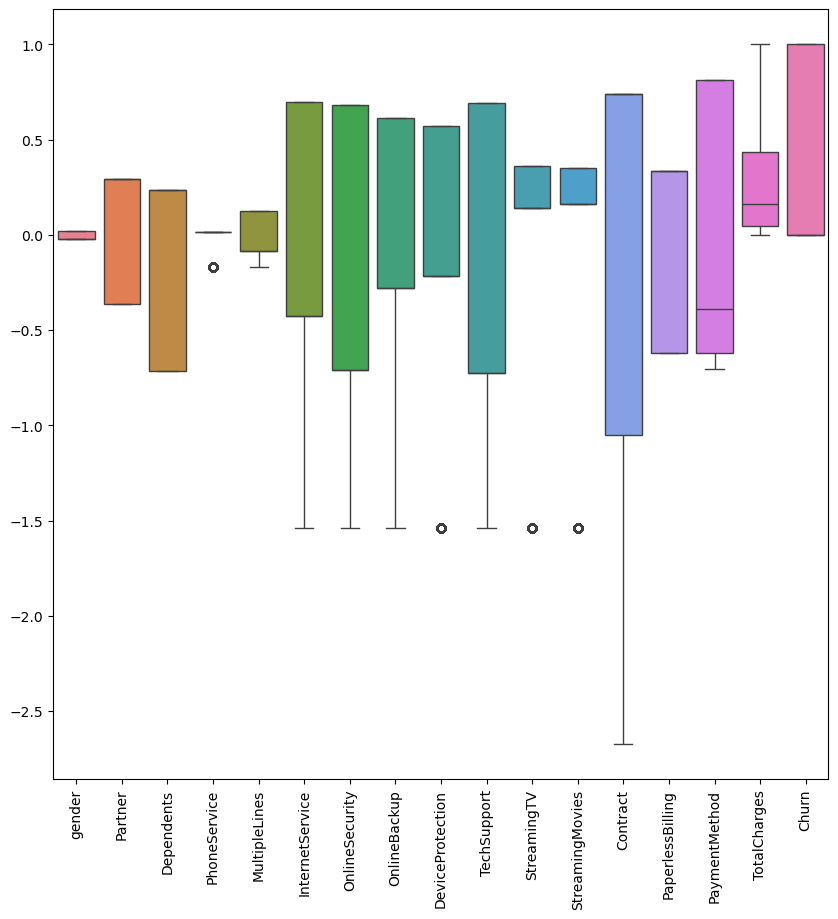

In [409]:
plt.figure(figsize=(10, 10))
sns.boxplot(combined_df[combined_df.columns])
plt.xticks(rotation=90)
plt.show()

In [410]:
combined_df.PhoneService.value_counts()

PhoneService
 0.017098    10137
-0.166409     1091
Name: count, dtype: int64

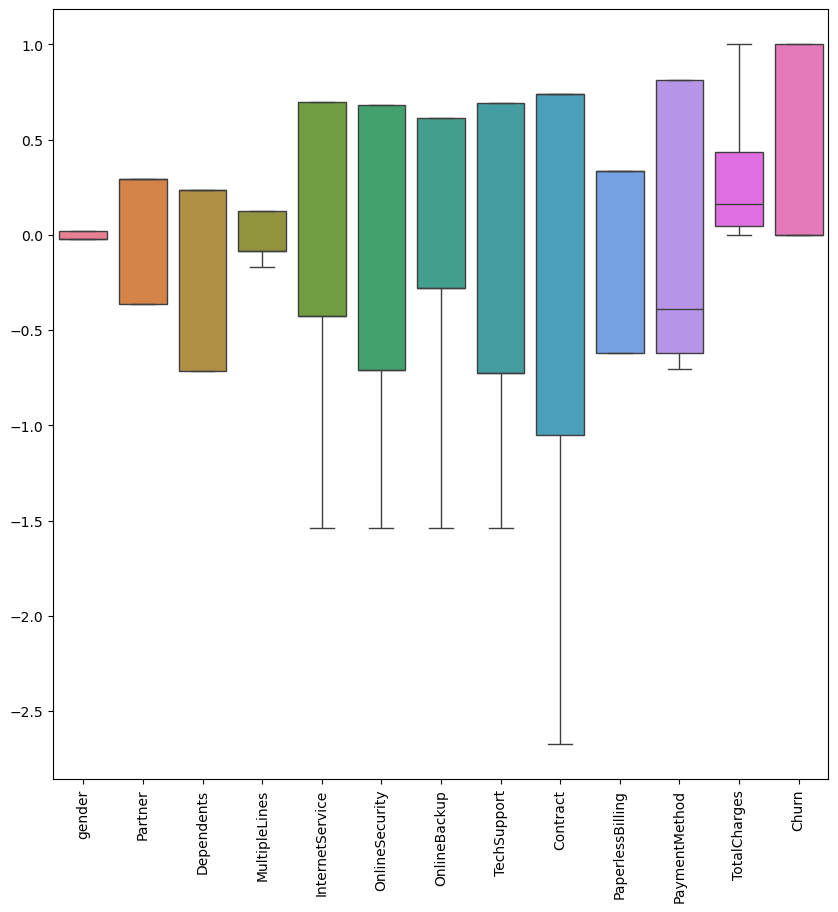

In [411]:
# these columns caused error in streamlit for suvbmission
cols = ['PhoneService', 'DeviceProtection', 'StreamingTV', 'StreamingMovies']

combined_df = combined_df.drop(cols, axis=1)
plt.figure(figsize=(10, 10))
sns.boxplot(combined_df[combined_df.columns])
plt.xticks(rotation=90)
plt.show()

In [412]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11228 entries, 7975 to 7743
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            11228 non-null  float64
 1   Partner           11228 non-null  float64
 2   Dependents        11228 non-null  float64
 3   MultipleLines     11228 non-null  float64
 4   InternetService   11228 non-null  float64
 5   OnlineSecurity    11228 non-null  float64
 6   OnlineBackup      11228 non-null  float64
 7   TechSupport       11228 non-null  float64
 8   Contract          11228 non-null  float64
 9   PaperlessBilling  11228 non-null  float64
 10  PaymentMethod     11228 non-null  float64
 11  TotalCharges      11228 non-null  float64
 12  Churn             11228 non-null  int32  
dtypes: float64(12), int32(1)
memory usage: 1.2 MB


In [413]:
combined_df['Churn'].value_counts()

Churn
0    8299
1    2929
Name: count, dtype: int64

Text(0.5, 1.0, 'Before SMOTE')

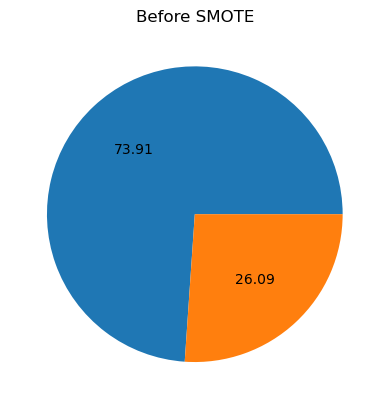

In [414]:
# plot the proportions
plt.pie(combined_df['Churn'].value_counts(), autopct='%.2f');
plt.title('Before SMOTE')

In [415]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

X_sm, y_sm = smote.fit_resample(combined_df.drop('Churn', axis=1), combined_df['Churn'])

X_sm.shape, y_sm.shape

((16598, 12), (16598,))

In [416]:
X_sm.head()

,gender,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,Contract,PaperlessBilling,PaymentMethod,TotalCharges
0,0.022983,0.293898,-0.714323,-0.083609,-1.537207,-1.537207,-1.537207,-1.537207,-1.052855,-0.621655,-0.388726,0.031202
1,-0.022554,-0.364836,-0.714323,0.124019,-0.426509,0.680278,-0.279726,-0.724094,-1.052855,0.335600,-0.620943,0.610433
2,0.022983,-0.364836,0.237943,-0.083609,-0.426509,0.680278,-0.279726,0.692830,0.739166,0.335600,0.812059,0.070580
3,-0.022554,-0.364836,0.237943,0.124019,0.698100,-0.711706,-0.279726,0.692830,0.739166,0.335600,0.812059,0.388056
4,-0.022554,0.293898,0.237943,-0.083609,-1.537207,-1.537207,-1.537207,-1.537207,0.739166,0.335600,-0.388726,0.035676


In [417]:
y_sm.head()

0    0
1    1
2    0
3    0
4    0
Name: Churn, dtype: int32

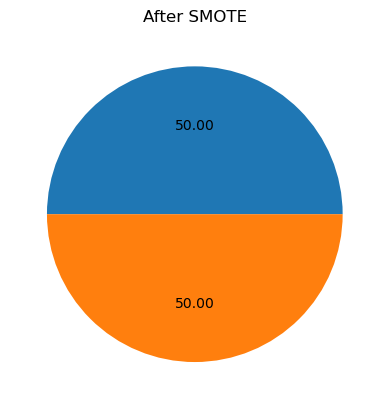

In [418]:
# plot the proportion
plt.pie(y_sm.value_counts(), autopct='%.2f');
plt.title('After SMOTE');

In [419]:
# combined into a dataframe again
combined_df = pd.concat([X_sm, y_sm], axis=1)
combined_df

,gender,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0.022983,0.293898,-0.714323,-0.083609,-1.537207,-1.537207,-1.537207,-1.537207,-1.052855,-0.621655,-0.388726,0.031202,0
1,-0.022554,-0.364836,-0.714323,0.124019,-0.426509,0.680278,-0.279726,-0.724094,-1.052855,0.335600,-0.620943,0.610433,1
2,0.022983,-0.364836,0.237943,-0.083609,-0.426509,0.680278,-0.279726,0.692830,0.739166,0.335600,0.812059,0.070580,0
3,-0.022554,-0.364836,0.237943,0.124019,0.698100,-0.711706,-0.279726,0.692830,0.739166,0.335600,0.812059,0.388056,0
4,-0.022554,0.293898,0.237943,-0.083609,-1.537207,-1.537207,-1.537207,-1.537207,0.739166,0.335600,-0.388726,0.035676,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,0.022983,-0.364836,-0.714323,-0.083609,0.698100,0.680278,0.615266,0.692830,-1.052855,0.335600,-0.620943,0.299679,1
16594,-0.022554,0.293898,0.237943,-0.083609,0.698100,0.680278,-0.279726,0.692830,0.739166,0.335600,-0.702082,0.164256,1
16595,-0.022554,-0.364836,-0.714323,-0.083609,0.698100,0.680278,0.615266,0.692830,0.739166,0.335600,-0.620943,0.074851,1
16596,0.003825,0.293898,0.237943,0.124019,0.698100,0.680278,-0.279726,0.692830,0.739166,0.335600,-0.702082,0.148512,1


In [420]:
combined_df.isna().sum().sum()

0

In [421]:
combined_df.duplicated().sum()

5285

In [422]:
combined_df.drop_duplicates(inplace=True)

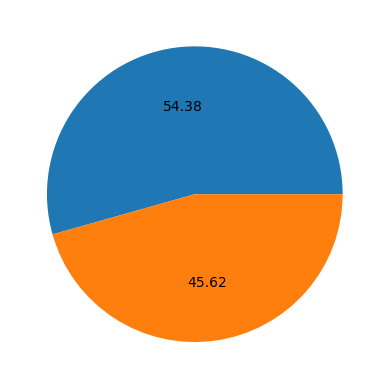

In [423]:
plt.pie(combined_df['Churn'].value_counts(), autopct='%.2f');
plt.show('After SMOTE (Dropping duplicated values)')

In [424]:
combined_df = combined_df.sample(frac=1).reset_index(drop=True)
combined_df

,gender,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,-0.022554,0.293898,0.237943,0.124019,0.698100,0.680278,0.615266,0.692830,0.739166,-0.621655,-0.388726,0.062860,1
1,0.006079,-0.364836,-0.714323,-0.083609,-1.537207,-1.537207,-1.537207,-1.537207,0.739166,-0.621655,-0.388726,0.006387,1
2,0.022983,0.293898,0.237943,-0.083609,-0.426509,0.680278,0.615266,0.692830,0.739166,-0.621655,0.812059,0.017721,1
3,0.022983,-0.364836,0.237943,0.124019,-0.426509,-0.711706,-0.279726,-0.724094,-2.673984,-0.621655,-0.702082,0.750209,0
4,0.022983,0.293898,0.237943,0.124019,0.698100,0.680278,0.615266,0.692830,0.739166,0.335600,-0.702082,0.029642,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11308,-0.022554,-0.364836,0.237943,0.124019,0.698100,0.680278,-0.279726,0.692830,0.739166,0.335600,0.812059,0.612573,1
11309,0.018979,0.293898,0.237943,-0.166409,-0.426509,0.680278,0.615266,0.692830,0.739166,0.335600,0.812059,0.130794,1
11310,0.022983,-0.364836,0.237943,0.124019,-0.426509,-0.711706,-0.279726,-0.724094,0.739166,0.335600,-0.388726,0.159332,0
11311,0.022983,0.293898,0.237943,0.124019,0.698100,0.680278,0.615266,0.692830,0.739166,0.335600,0.812059,0.009600,1


In [425]:
# submit our clean dataset
clean_df_chn = combined_df.copy()
clean_df_chn.to_csv('clean_dataset/clean_chn.csv', index=False)

## 3. Data FDC.csv

In [426]:
df_fdc = pd.read_csv('dataset/FDC.csv')
df_fdc.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


TODO:
- Handle missing values
- Convert numerical-like object to numerical dtypes
- Remove unnecessary columns

In [427]:
df_fdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

In [428]:
check_data(df_fdc)

There are 149 missing values in the dataset.
There are 0 duplicated values in the dataset.


Numerical columns

In [429]:
num_cols = [var for var in df_fdc.columns if df_fdc[var].dtypes != 'O']

for col in num_cols:
    mean_col = df_fdc[col].mean()
    df_fdc[col].fillna(mean_col, inplace=True)

check_data(df_fdc)

There are 50 missing values in the dataset.
There are 0 duplicated values in the dataset.


Object columns

In [430]:
obj_cols = [var for var in df_fdc.columns if df_fdc[var].dtypes == 'O']
df_fdc[obj_cols].head()

,GPA,comfort_food,comfort_food_reasons,diet_current,eating_changes,father_profession,fav_cuisine,food_childhood,healthy_meal,ideal_diet,meals_dinner_friend,mother_profession,type_sports,weight
0,2.4,none,we dont have comfort,eat good and exercise,eat faster,profesor,Arabic cuisine,rice and chicken,looks not oily,being healthy,"rice, chicken, soup",unemployed,car racing,187
1,3.654,"chocolate, chips, ice cream","Stress, bored, anger",I eat about three times a day with some snacks...,I eat out more than usual.,Self employed,Italian,"chicken and biscuits, beef soup, baked beans","Grains, Veggies, (more of grains and veggies),...",Try to eat 5-6 small meals a day. While trying...,"Pasta, steak, chicken",Nurse RN,Basketball,155
2,3.3,"frozen yogurt, pizza, fast food","stress, sadness","toast and fruit for breakfast, salad for lunch...",sometimes choosing to eat fast food instead of...,owns business,italian,"mac and cheese, pizza, tacos",usually includes natural ingredients; nonproce...,i would say my ideal diet is my current diet,"chicken and rice with veggies, pasta, some kin...",owns business,none,I'm not answering this.
3,3.2,"Pizza, Mac and cheese, ice cream",Boredom,"College diet, cheap and easy foods most nights...",Accepting cheap and premade/store bought foods,Mechanic,Turkish,"Beef stroganoff, tacos, pizza","Fresh fruits& vegetables, organic meats","Healthy, fresh veggies/fruits & organic foods",Grilled chicken \rStuffed Shells\rHomemade Chili,Special Education Teacher,NaN,"Not sure, 240"
4,3.5,"Ice cream, chocolate, chips","Stress, boredom, cravings",I try to eat healthy but often struggle becaus...,I have eaten generally the same foods but I do...,IT,Italian,"Pasta, chicken tender, pizza","A lean protein such as grilled chicken, green ...",Ideally I would like to be able to eat healthi...,"Chicken Parmesan, Pulled Pork, Spaghetti and m...",Substance Abuse Conselor,Softball,190


In [431]:
df_fdc['GPA'].unique()

array(['2.4', '3.654', '3.3', '3.2', '3.5', '2.25', '3.8', '3.904', '3.4',
       '3.6', '3.1', nan, '4', '2.2', '3.87', '3.7', '3.9', '2.8', '3',
       '3.65', '3.89', '2.9', '3.605', '3.83', '3.292', '3.35',
       'Personal ', '2.6', '3.67', '3.73', '3.79 bitch', '2.71', '3.68',
       '3.75', '3.92', 'Unknown', '3.77', '3.63', '3.882'], dtype=object)

In [432]:
df_fdc['weight'].unique()

array(['187', '155', "I'm not answering this. ", 'Not sure, 240', '190',
       '180', '137', '125', '116', '110', '264', '123', '185', '145',
       '170', '135', '165', '175', '195', '105', '160', '167', '115',
       '205', nan, '128', '150', '140', '120', '100', '113', '168', '169',
       '200', '265', '192', '118', '210', '112', '144 lbs', '130', '127',
       '129', '260', '184', '230', '138', '156'], dtype=object)

Converting GPA & weight into numerical dtypes

In [433]:
df_fdc['GPA'] = pd.to_numeric(df_fdc['GPA'], errors='coerce')
df_fdc['GPA'].fillna(df_fdc['GPA'].mean(), inplace=True)

df_fdc['weight'] = pd.to_numeric(df_fdc['weight'], errors='coerce')
df_fdc['weight'].fillna(df_fdc['weight'].mean(), inplace=True)

In [434]:
df_fdc['GPA'].unique()

array([2.4       , 3.654     , 3.3       , 3.2       , 3.5       ,
       2.25      , 3.8       , 3.904     , 3.4       , 3.6       ,
       3.1       , 3.41555833, 4.        , 2.2       , 3.87      ,
       3.7       , 3.9       , 2.8       , 3.        , 3.65      ,
       3.89      , 2.9       , 3.605     , 3.83      , 3.292     ,
       3.35      , 2.6       , 3.67      , 3.73      , 2.71      ,
       3.68      , 3.75      , 3.92      , 3.77      , 3.63      ,
       3.882     ])

In [435]:
df_fdc['weight'].unique()

array([187. , 155. , 158.5, 190. , 180. , 137. , 125. , 116. , 110. ,
       264. , 123. , 185. , 145. , 170. , 135. , 165. , 175. , 195. ,
       105. , 160. , 167. , 115. , 205. , 128. , 150. , 140. , 120. ,
       100. , 113. , 168. , 169. , 200. , 265. , 192. , 118. , 210. ,
       112. , 130. , 127. , 129. , 260. , 184. , 230. , 138. , 156. ])

In [436]:
check_data(df_fdc)

There are 46 missing values in the dataset.
There are 0 duplicated values in the dataset.


In [437]:
df_fdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           125 non-null    float64
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  125 non-null    float64
 5   calories_scone                125 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    125 non-null    float64
 10  cook                          125 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       125 non-null    float64
 13  diet_

In [438]:
df_fdc.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.400,2,1,430,3.028302,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187.0
1,3.654,1,1,610,3.000000,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155.0
2,3.300,1,1,720,4.000000,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,158.5
3,3.200,1,1,430,3.000000,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,158.5
4,3.500,1,1,720,2.000000,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190.0


In [439]:
for col in obj_cols:
    print(df_fdc[col].value_counts().sort_values(ascending=False))
    print('-'*50)

GPA
3.500000    13
3.000000    11
3.200000    10
3.700000    10
3.300000     9
3.400000     9
3.900000     7
3.600000     7
3.800000     6
3.415558     5
2.800000     5
4.000000     4
3.100000     3
2.900000     2
3.830000     2
2.600000     2
2.250000     1
3.904000     1
3.292000     1
2.200000     1
3.870000     1
3.654000     1
3.650000     1
3.890000     1
3.605000     1
3.750000     1
2.400000     1
3.670000     1
3.730000     1
2.710000     1
3.680000     1
3.630000     1
3.770000     1
3.920000     1
3.350000     1
3.882000     1
Name: count, dtype: int64
--------------------------------------------------
comfort_food
none                                            1
cookies, donuts, candy bars                     1
frozen yogurt, pizza, fast food                 1
Pizza, Mac and cheese, ice cream                1
Ice cream, chocolate, chips                     1
                                               ..
Pizza / Wings / Cheesecake                      1
rice, potato, se

In [440]:
df_fdc['fav_cuisine'].value_counts().sort_values(ascending=False)

fav_cuisine
Italian                                     22
Italian                                     19
italian                                      6
Mexican                                      5
Mexican                                      4
American                                     3
American                                     3
Chinese                                      3
Asian                                        2
Thai                                         2
Korean                                       2
Indian                                       2
italian                                      2
Chinese                                      2
Italian food                                 1
Turkish                                      1
African                                      1
Anything american style.                     1
Seafood                                      1
Orange chicken and chow mani noodles         1
italian food                                 1
J

In [441]:
num_cols = []

for col in df_fdc.columns:
    if df_fdc[col].dtypes != 'O':
        num_cols.append(col)

clean_df_fdc = df_fdc[num_cols]

In [442]:
clean_df_fdc

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,...,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories,weight
0,2.400,2,1,430,3.028302,315.0,1,9.000000,2.000000,9,...,3.0,1.0,1.000000,1,1165.0,345,5,1,1315,187.0
1,3.654,1,1,610,3.000000,420.0,2,1.000000,3.000000,1,...,3.0,1.0,1.000000,2,725.0,690,4,2,900,155.0
2,3.300,1,1,720,4.000000,420.0,2,1.000000,1.000000,1,...,6.0,1.0,2.000000,5,1165.0,500,5,1,900,158.5
3,3.200,1,1,430,3.000000,420.0,2,2.000000,2.000000,2,...,5.0,1.0,2.000000,5,725.0,690,3,1,1315,158.5
4,3.500,1,1,720,2.000000,420.0,2,1.000000,1.000000,1,...,4.0,1.0,1.000000,4,940.0,500,4,2,760,190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.500,1,1,610,4.000000,420.0,2,2.698113,3.000000,2,...,4.0,1.0,1.000000,5,940.0,500,5,1,1315,156.0
121,3.000,1,1,265,2.000000,315.0,2,2.698113,3.000000,3,...,4.0,1.0,1.390244,4,940.0,500,5,2,1315,180.0
122,3.882,1,1,720,3.028302,420.0,1,2.698113,3.000000,3,...,4.0,1.0,2.000000,5,580.0,690,4,2,1315,120.0
123,3.000,2,1,720,4.000000,420.0,1,2.698113,3.000000,7,...,2.0,2.0,2.000000,1,940.0,500,3,1,1315,135.0


In [443]:
len(df_fdc)

125

In [444]:
clean_df_fdc.weight

0      187.0
1      155.0
2      158.5
3      158.5
4      190.0
       ...  
120    156.0
121    180.0
122    120.0
123    135.0
124    135.0
Name: weight, Length: 125, dtype: float64

<Axes: ylabel='weight'>

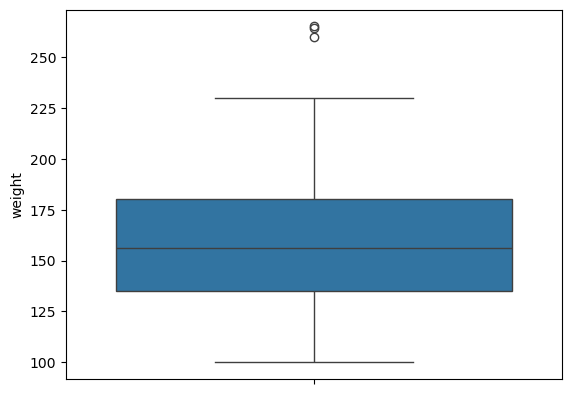

In [445]:
sns.boxplot(clean_df_fdc.weight)

<Axes: >

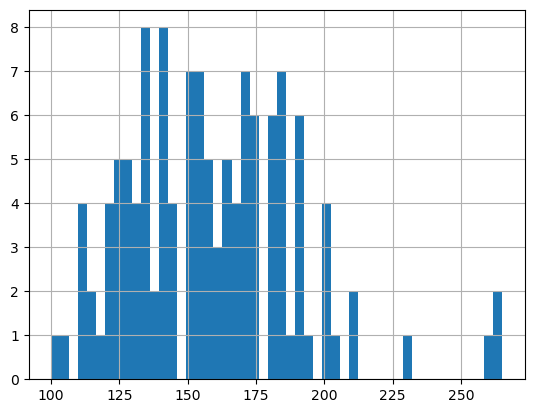

In [446]:
clean_df_fdc.weight.hist(bins=50)

In [447]:
# winsorize
from feature_engine.outliers import Winsorizer
winsor = Winsorizer(capping_method='iqr', tail='right', fold=1.5, variables=['weight'])
clean_df_fdc = winsor.fit_transform(clean_df_fdc)

<Axes: >

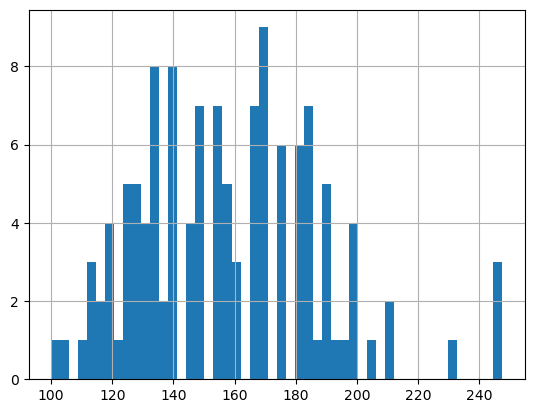

In [448]:
clean_df_fdc.weight.hist(bins=50)

<Axes: ylabel='weight'>

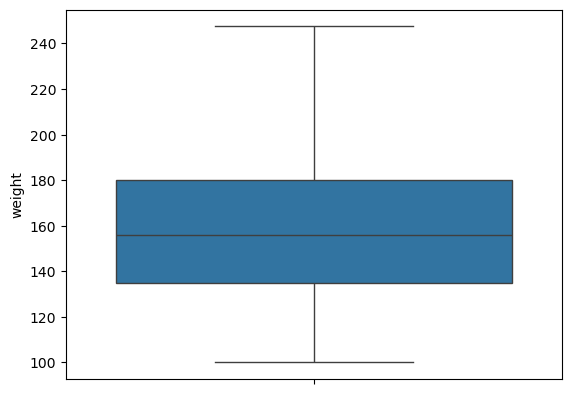

In [449]:
sns.boxplot(clean_df_fdc.weight)

In [450]:
check_data(clean_df_fdc)

There are 0 missing values in the dataset.
There are 0 duplicated values in the dataset.


In [451]:
clean_df_fdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           125 non-null    float64
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  125 non-null    float64
 5   calories_scone                125 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food_reasons_coded    125 non-null    float64
 8   cook                          125 non-null    float64
 9   comfort_food_reasons_coded.1  125 non-null    int64  
 10  cuisine                       125 non-null    float64
 11  diet_current_coded            125 non-null    int64  
 12  drink                         125 non-null    float64
 13  eatin

In [452]:
# submit our dataset
clean_df_fdc.to_csv('clean_dataset/clean_fdc.csv', index=False)

## 4. Data HSP.csv

In [453]:
df_hsp = pd.read_csv('dataset/HSP.csv')
df_hsp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [454]:
df_hsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [455]:
highest_cols = ['Id', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

df_hsp[highest_cols].isna().sum() / len(df_hsp) 

Id             0.000000
Alley          0.937671
MasVnrType     0.597260
FireplaceQu    0.472603
PoolQC         0.995205
Fence          0.807534
MiscFeature    0.963014
dtype: float64

In [456]:
df_hsp.drop(highest_cols, axis=1, inplace=True)

In [457]:
df_hsp.isna().sum().sort_values(ascending=False).head(15)

LotFrontage     259
GarageYrBlt      81
GarageCond       81
GarageType       81
GarageFinish     81
GarageQual       81
BsmtFinType2     38
BsmtExposure     38
BsmtQual         37
BsmtFinType1     37
BsmtCond         37
MasVnrArea        8
Electrical        1
TotRmsAbvGrd      0
KitchenQual       0
dtype: int64

In [458]:
# df_hsp.isna().sum().sort_values(ascending=False).head(15)

missing_col = [col for col in df_hsp.columns if df_hsp[col].isna().any()]
missing_col

['LotFrontage',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [459]:
X_train, X_test, y_train, y_test = train_test_split(df_hsp.iloc[:,:-1],
                                                    df_hsp.iloc[:,-1],
                                                    test_size=0.3,
                                                    random_state=42)

X_train.shape, X_test.shape

((1022, 73), (438, 73))

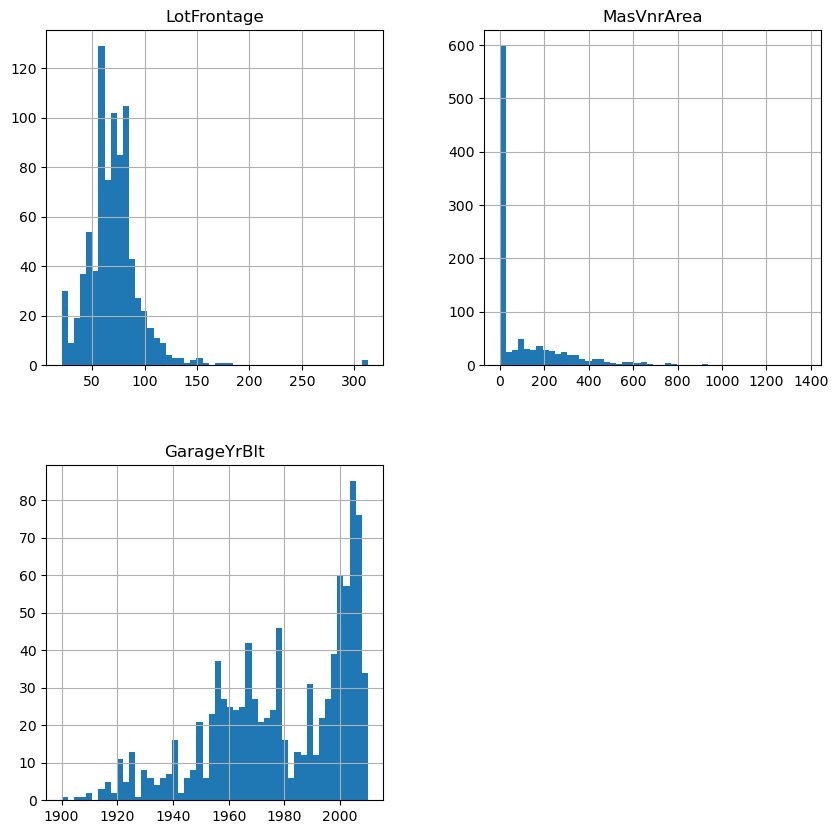

In [460]:
X_train[missing_col].hist(bins=50, figsize=(10, 10));

In [461]:
# fill `LotFrontage` with Arbritary number
X_train['LotFrontage'].max(), df_hsp['LotFrontage'].min()



(313.0, 21.0)

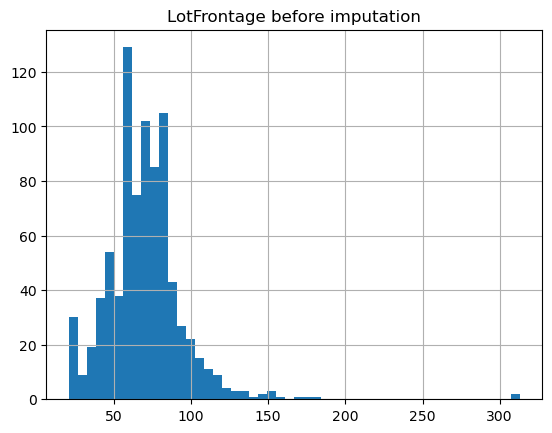

In [462]:
X_train['LotFrontage'].hist(bins=50)
plt.title('LotFrontage before imputation')
plt.show()

Input arbitrary number for `LotFrontage`

In [463]:
imputer = ArbitraryNumberImputer(
    arbitrary_number= -1,
    variables=['LotFrontage'],
)

imputer.fit(X_train)

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train['LotFrontage'].isna().sum()

0

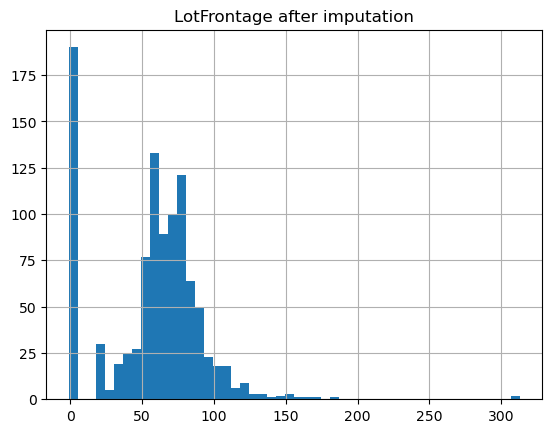

In [464]:
X_train['LotFrontage'].hist(bins=50)
plt.title('LotFrontage after imputation')
plt.show()

In [465]:
# Median Imputation for MasVnrArea and GarageYrBlt

imputer = MeanMedianImputer(
    imputation_method='median',
    variables=['MasVnrArea', 'GarageYrBlt'],
)

imputer.fit(X_train)

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train[imputer.variables_].isna().sum()

MasVnrArea     0
GarageYrBlt    0
dtype: int64

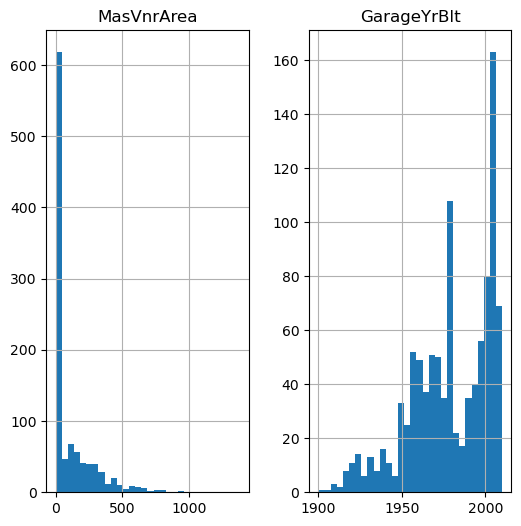

In [466]:
X_train[imputer.variables_].hist(bins=30, figsize=(6, 6))
plt.show()

In [467]:
X_train.isna().sum().sort_values(ascending=False).head(15)

GarageType      54
GarageFinish    54
GarageQual      54
GarageCond      54
BsmtFinType1    26
BsmtQual        26
BsmtCond        26
BsmtExposure    26
BsmtFinType2    26
Electrical       1
FullBath         0
TotRmsAbvGrd     0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
dtype: int64

In [468]:
missing_col_cat = [col for col in X_train.columns if X_train[col].isna().any() and X_train[col].dtypes == 'O']
missing_col_cat


['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [469]:
imputer = CategoricalImputer(
    imputation_method='frequent',
    variables=missing_col_cat
)

imputer.fit(X_train)

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train[imputer.variables_].isna().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [470]:
imputer.imputer_dict_

{'BsmtQual': 'TA',
 'BsmtCond': 'TA',
 'BsmtExposure': 'No',
 'BsmtFinType1': 'Unf',
 'BsmtFinType2': 'Unf',
 'Electrical': 'SBrkr',
 'GarageType': 'Attchd',
 'GarageFinish': 'Unf',
 'GarageQual': 'TA',
 'GarageCond': 'TA'}

In [471]:
X_train.isna().sum().sort_values(ascending=False).head(15)

MSSubClass      0
HeatingQC       0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
dtype: int64

In [472]:
X_test.isna().sum().sort_values(ascending=False).head(15)

MSSubClass      0
HeatingQC       0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
dtype: int64

Encoding Non Numeric columns

In [473]:
cat_cols = [col for col in X_train.columns if X_train[col].dtypes == 'O']

cat_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [474]:
encoder = OrdinalEncoder(encoding_method='arbitrary', variables=cat_cols)

encoder.fit(X_train)

X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

X_train[cat_cols].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1452,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
762,2,0,0,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,0,1,0
932,0,0,1,0,0,1,0,2,1,0,...,0,2,0,0,1,0,0,0,0,0
435,0,0,2,0,0,2,0,3,2,0,...,0,1,0,0,2,0,0,0,2,0


In [475]:
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = sc.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train.shape, X_test.shape

((1022, 73), (438, 73))

In [476]:
# adding target variable to the dataset
train = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
test = pd.concat([X_test, y_test.reset_index(drop=True)], axis=1)

# combine the train and test set into a dataframe
combined_hsp = pd.concat([train, test], axis=0, ignore_index=True)

In [477]:
combined_hsp.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-0.868950,-0.435476,0.634695,-0.030504,-0.062684,-0.710834,-0.294543,-0.031296,-0.571959,-0.231199,...,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-0.514944,0.140293,-0.363988,-0.398667,174000
1,2.882618,1.023725,-0.612832,-0.624365,-0.062684,-0.710834,-0.294543,-0.031296,-0.571959,-0.231199,...,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-0.514944,-1.368961,-0.363988,-0.398667,145000
2,0.068942,2.482926,0.412913,-0.185924,-0.062684,-0.710834,-0.294543,-0.031296,-0.571959,-0.231199,...,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-0.137417,1.649546,0.477632,-0.398667,215200
3,-0.868950,-0.435476,0.745587,0.081645,-0.062684,0.970815,-0.294543,-0.031296,0.682423,-0.231199,...,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-1.269997,-0.614334,-0.363988,-0.398667,320000
4,0.068942,-0.435476,-0.391049,-0.006927,-0.062684,2.652464,-0.294543,-0.031296,1.936804,-0.231199,...,-0.346372,-0.119317,-0.275896,-0.069193,-0.122987,-0.892471,0.894920,1.319252,-0.398667,212000


In [478]:
check_data(combined_hsp)

There are 6 missing values in the dataset.
There are 0 duplicated values in the dataset.


In [479]:
combined_hsp.isna().sum().sort_values(ascending=False)

Condition2     3
Electrical     1
RoofMatl       1
Exterior1st    1
GarageYrBlt    0
              ..
Foundation     0
ExterCond      0
ExterQual      0
MasVnrArea     0
SalePrice      0
Length: 74, dtype: int64

In [480]:
combined_hsp.dropna(inplace=True)
print(combined_hsp.shape)
combined_hsp.isna().sum().sort_values(ascending=False)

(1454, 74)


MSSubClass      0
GarageYrBlt     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
               ..
ExterQual       0
MasVnrArea      0
Exterior2nd     0
Exterior1st     0
SalePrice       0
Length: 74, dtype: int64

In [481]:
combined_hsp.SalePrice

0       174000
1       145000
2       215200
3       320000
4       212000
         ...  
1455    139000
1456    126175
1457    205950
1458    110000
1459    485000
Name: SalePrice, Length: 1454, dtype: int64

<Axes: ylabel='SalePrice'>

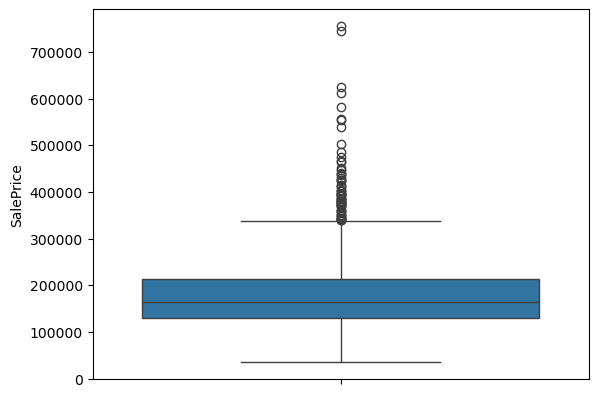

In [482]:
# checking out outliers in the SalePrice target variable
sns.boxplot(combined_hsp.SalePrice)

<Axes: >

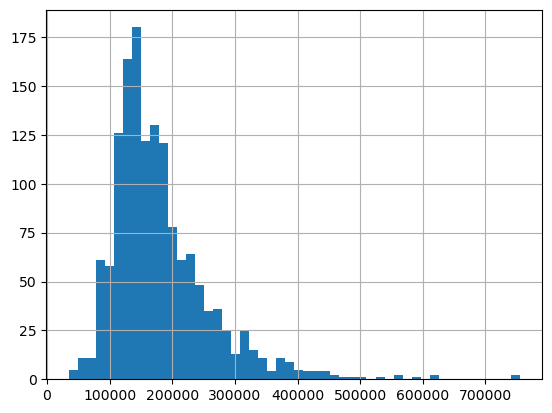

In [483]:
combined_hsp.SalePrice.hist(bins=50)

In [484]:
# winsorize outliers
from feature_engine.outliers import Winsorizer

winsor = Winsorizer(capping_method='iqr', tail='right', fold=1.5, variables=['SalePrice'])


combined_hsp = winsor.fit_transform(combined_hsp)


<Axes: >

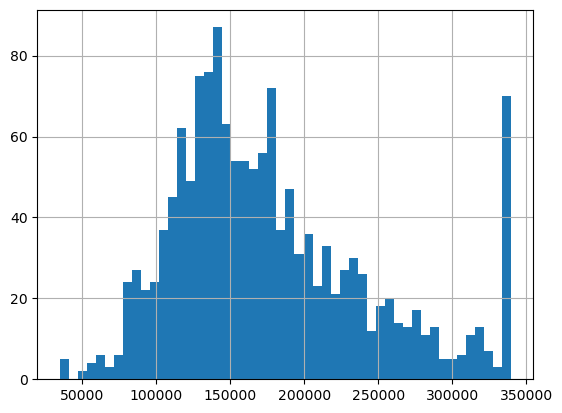

In [485]:
combined_hsp.SalePrice.hist(bins=50)

<Axes: ylabel='SalePrice'>

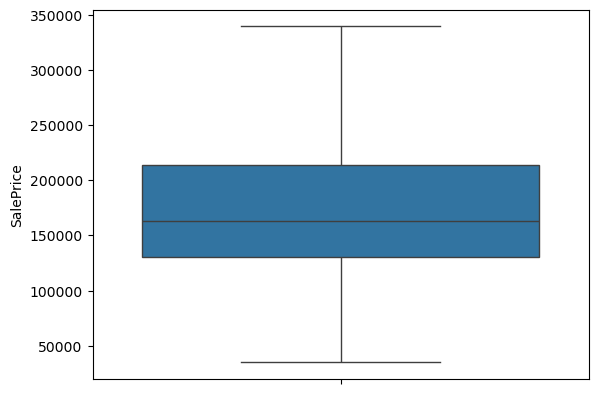

In [486]:
sns.boxplot(combined_hsp.SalePrice)

In [487]:
check_data(combined_hsp)

There are 0 missing values in the dataset.
There are 0 duplicated values in the dataset.


In [488]:
combined_hsp.to_csv('clean_dataset/hsp_clean.csv', index=False)

## 5. Data SHP.csv

In [489]:
df_shp = pd.read_csv('dataset/SHP.csv')
df_shp.head()

,Unnamed: 0,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
1,1,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
2,2,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
3,3,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
4,4,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,inf,Candra Jacostaffey,True


**TODO**:
- Drop unnecessary columns
- Convert column that is assigned to object for numerical columns
- Check Label Cardinality for categorical values
- Handle missing values
    - Drop the column if the proportion of missing value is a lot
- Encode categorical columns
- Feature scale (if needed) 

In [490]:
df_shp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12138 entries, 0 to 12137
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    12138 non-null  int64 
 1   PassengerId   12138 non-null  object
 2   HomePlanet    11985 non-null  object
 3   CryoSleep     11955 non-null  object
 4   Cabin         11982 non-null  object
 5   Destination   11981 non-null  object
 6   Age           11993 non-null  object
 7   VIP           11963 non-null  object
 8   RoomService   12002 non-null  object
 9   FoodCourt     11991 non-null  object
 10  ShoppingMall  11964 non-null  object
 11  Spa           11985 non-null  object
 12  VRDeck        11975 non-null  object
 13  Name          11973 non-null  object
 14  Transported   12138 non-null  bool  
dtypes: bool(1), int64(1), object(13)
memory usage: 1.3+ MB


Dropping unnecessary columns

In [491]:
df_shp.drop(['Unnamed: 0', 'PassengerId', 'Name'], axis=1, inplace=True)
df_shp.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
1,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
2,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,True
3,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,True
4,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,inf,True


Convert column that is assigned to object for numerical columns

In [492]:
num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# check for abnormal values
for col in num_cols:
    counts = df_shp[col].value_counts().sort_values(ascending=False)
    print(f"Value counts for {col}:")
    print(counts)
    print('-'*50)

Value counts for Age:
Age
18.0    450
24.0    429
21.0    421
23.0    410
19.0    407
       ... 
72.0      4
78.0      4
77.0      3
79.0      3
76.0      2
Name: count, Length: 83, dtype: int64
--------------------------------------------------
Value counts for RoomService:
RoomService
0.0       8345
1.0        156
2.0        109
3.0         75
-           69
          ... 
2937.0       1
3481.0       1
1912.0       1
3211.0       1
745.0        1
Name: count, Length: 1276, dtype: int64
--------------------------------------------------
Value counts for FoodCourt:
FoodCourt
0.0       7959
1.0        135
2.0         87
-           76
3.0         64
          ... 
4929.0       1
1174.0       1
298.0        1
3103.0       1
6819.0       1
Name: count, Length: 1510, dtype: int64
--------------------------------------------------
Value counts for ShoppingMall:
ShoppingMall
0.0       8169
1.0        192
2.0         93
-           82
3.0         81
          ... 
1006.0       1
667.0       

In [493]:
# replace '-', 'inf', '-inf' with 0 in the specified columns
df_shp[num_cols] = df_shp[num_cols].replace({'-': 0, '-inf': 0, 'inf': 0})

# check for abnormal values
for col in num_cols:
    counts = df_shp[col].value_counts().sort_values(ascending=False)
    print(f"Value counts for {col}:")
    print(counts)
    print('-'*50)

Value counts for Age:
Age
18.0    450
24.0    429
21.0    421
23.0    410
19.0    407
       ... 
72.0      4
78.0      4
77.0      3
79.0      3
76.0      2
Name: count, Length: 81, dtype: int64
--------------------------------------------------
Value counts for RoomService:
RoomService
0.0       8345
1.0        156
2.0        109
0           98
3.0         75
          ... 
2937.0       1
3481.0       1
1912.0       1
3211.0       1
745.0        1
Name: count, Length: 1274, dtype: int64
--------------------------------------------------
Value counts for FoodCourt:
FoodCourt
0.0       7959
1.0        135
0          107
2.0         87
3.0         64
          ... 
4524.0       1
1406.0       1
9307.0       1
6634.0       1
6819.0       1
Name: count, Length: 1508, dtype: int64
--------------------------------------------------
Value counts for ShoppingMall:
ShoppingMall
0.0       8169
1.0        192
0          117
2.0         93
3.0         81
          ... 
1386.0       1
536.0       

In [494]:
# convert to numerical columns
df_shp[num_cols] = df_shp[num_cols].astype(float)

In [495]:
df_shp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12138 entries, 0 to 12137
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    11985 non-null  object 
 1   CryoSleep     11955 non-null  object 
 2   Cabin         11982 non-null  object 
 3   Destination   11981 non-null  object 
 4   Age           11993 non-null  float64
 5   VIP           11963 non-null  object 
 6   RoomService   12002 non-null  float64
 7   FoodCourt     11991 non-null  float64
 8   ShoppingMall  11964 non-null  float64
 9   Spa           11985 non-null  float64
 10  VRDeck        11975 non-null  float64
 11  Transported   12138 non-null  bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 1.0+ MB


In [496]:
df_shp.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
1,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
2,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,True
3,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,True
4,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,0.0,True


In [497]:
df_shp.Cabin.value_counts().sort_values(ascending=False)

Cabin
-           86
G/765/S     17
-inf        17
D/176/S     16
inf         15
            ..
F/1788/P     1
F/1681/S     1
E/566/S      1
F/1766/P     1
G/1499/S     1
Name: count, Length: 6563, dtype: int64

In [498]:
# replacing "-", '-inf', 'inf' with "XX"
df_shp = df_shp.replace({'Cabin': {'-': 'XX', '-inf': 'XX', 'inf': 'XX'}})
df_shp.Cabin.value_counts().sort_values(ascending=False)

Cabin
XX          118
G/765/S      17
D/176/S      16
B/123/S      13
C/137/S      13
           ... 
F/1788/P      1
F/1681/S      1
E/566/S       1
F/1766/P      1
G/1499/S      1
Name: count, Length: 6561, dtype: int64

In [499]:
# extract cabin with the first letter except for "Unknown" value
df_shp['Cabin'] = df_shp['Cabin'].astype(str).str[0]

# replacing "X" with "Unknown"
df_shp['Cabin'] = df_shp['Cabin'].replace('X', 'Unknown')

df_shp.Cabin.value_counts().sort_values(ascending=False)

Cabin
F          3770
G          3572
B          1221
C          1175
E          1134
D           635
A           352
n           156
Unknown     118
T             5
Name: count, dtype: int64

In [500]:
df_shp.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Earth,False,F,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
1,Earth,False,F,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
2,Earth,False,F,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,True
3,Earth,False,F,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,True
4,Earth,True,G,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,0.0,True


In [501]:
df_shp.Destination.value_counts().sort_values(ascending=False)

Destination
TRAPPIST-1e      8126
55 Cancri e      2651
PSO J318.5-22    1096
-                  80
-inf               16
inf                12
Name: count, dtype: int64

In [502]:
# Replacing "-", '-inf', 'inf' with "Unknown"
df_shp = df_shp.replace({'Destination': {'-': 'Unknown', '-inf': 'Unknown', 'inf': 'Unknown'}})
df_shp.Destination.value_counts().sort_values(ascending=False)

Destination
TRAPPIST-1e      8126
55 Cancri e      2651
PSO J318.5-22    1096
Unknown           108
Name: count, dtype: int64

In [503]:
df_shp.VIP.value_counts()

VIP
False    11589
True       265
-           71
inf         23
-inf        15
Name: count, dtype: int64

In [504]:
# Replacing "-", '-inf', 'inf' with "Unknown"
df_shp = df_shp.replace({'VIP': {'-': 'Unknown', '-inf': 'Unknown', 'inf': 'Unknown'}})
df_shp.VIP.value_counts()

VIP
False      11589
True         265
Unknown      109
Name: count, dtype: int64

In [505]:
df_shp.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Earth,False,F,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
1,Earth,False,F,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
2,Earth,False,F,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,True
3,Earth,False,F,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,True
4,Earth,True,G,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,0.0,True


In [506]:
# making sure the dtype is correct
df_shp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12138 entries, 0 to 12137
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    11985 non-null  object 
 1   CryoSleep     11955 non-null  object 
 2   Cabin         12138 non-null  object 
 3   Destination   11981 non-null  object 
 4   Age           11993 non-null  float64
 5   VIP           11963 non-null  object 
 6   RoomService   12002 non-null  float64
 7   FoodCourt     11991 non-null  float64
 8   ShoppingMall  11964 non-null  float64
 9   Spa           11985 non-null  float64
 10  VRDeck        11975 non-null  float64
 11  Transported   12138 non-null  bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 1.0+ MB


In [507]:
cat_cols = [col for col in df_shp.columns if df_shp[col].dtypes == 'O']

for col in cat_cols:
    print(f"Value counts for {col}:")
    print(df_shp[col].value_counts().sort_values(ascending=False))
    print('-'*50)

Value counts for HomePlanet:
HomePlanet
Earth     6118
Europa    3274
Mars      2473
-           96
-inf        13
inf         11
Name: count, dtype: int64
--------------------------------------------------
Value counts for CryoSleep:
CryoSleep
False    6886
True     4970
-          71
-inf       17
inf        11
Name: count, dtype: int64
--------------------------------------------------
Value counts for Cabin:
Cabin
F          3770
G          3572
B          1221
C          1175
E          1134
D           635
A           352
n           156
Unknown     118
T             5
Name: count, dtype: int64
--------------------------------------------------
Value counts for Destination:
Destination
TRAPPIST-1e      8126
55 Cancri e      2651
PSO J318.5-22    1096
Unknown           108
Name: count, dtype: int64
--------------------------------------------------
Value counts for VIP:
VIP
False      11589
True         265
Unknown      109
Name: count, dtype: int64
-------------------------------

In [508]:
# HomePlanet, CryoSleep, Name: Replacing "-", '-inf', 'inf' with "Unknown"
df_shp = df_shp.replace({'HomePlanet': {'-': 'Unknown', '-inf': 'Unknown', 'inf': 'Unknown'},
                         'CryoSleep': {'-': 'Unknown', '-inf': 'Unknown', 'inf': 'Unknown'},
                         'Name': {'-': 'Unknown', '-inf': 'Unknown', 'inf': 'Unknown'}})

for col in cat_cols:
    print(f"Value counts for {col}:")
    print(df_shp[col].value_counts().sort_values(ascending=False))
    print('-'*50)

Value counts for HomePlanet:
HomePlanet
Earth      6118
Europa     3274
Mars       2473
Unknown     120
Name: count, dtype: int64
--------------------------------------------------
Value counts for CryoSleep:
CryoSleep
False      6886
True       4970
Unknown      99
Name: count, dtype: int64
--------------------------------------------------
Value counts for Cabin:
Cabin
F          3770
G          3572
B          1221
C          1175
E          1134
D           635
A           352
n           156
Unknown     118
T             5
Name: count, dtype: int64
--------------------------------------------------
Value counts for Destination:
Destination
TRAPPIST-1e      8126
55 Cancri e      2651
PSO J318.5-22    1096
Unknown           108
Name: count, dtype: int64
--------------------------------------------------
Value counts for VIP:
VIP
False      11589
True         265
Unknown      109
Name: count, dtype: int64
--------------------------------------------------


In [509]:
df_shp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12138 entries, 0 to 12137
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    11985 non-null  object 
 1   CryoSleep     11955 non-null  object 
 2   Cabin         12138 non-null  object 
 3   Destination   11981 non-null  object 
 4   Age           11993 non-null  float64
 5   VIP           11963 non-null  object 
 6   RoomService   12002 non-null  float64
 7   FoodCourt     11991 non-null  float64
 8   ShoppingMall  11964 non-null  float64
 9   Spa           11985 non-null  float64
 10  VRDeck        11975 non-null  float64
 11  Transported   12138 non-null  bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 1.0+ MB


Clear for data anomalies

Handling missing & duplicated values:

In [510]:
df_shp.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Earth,False,F,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
1,Earth,False,F,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
2,Earth,False,F,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,True
3,Earth,False,F,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,True
4,Earth,True,G,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,0.0,True


In [511]:
check_data(df_shp)
print(df_shp.shape)

There are 1586 missing values in the dataset.
There are 5174 duplicated values in the dataset.
(12138, 12)


In [512]:
df_shp.duplicated().sum()

5174

In [513]:
# dropping duplicated values:
df_shp.drop_duplicates(inplace=True)
check_data(df_shp)
print(df_shp.shape)

There are 1256 missing values in the dataset.
There are 0 duplicated values in the dataset.
(6964, 12)


In [514]:
# checking out the missing values
df_shp.isna().sum().sort_values(ascending=False)

CryoSleep       151
ShoppingMall    145
VIP             139
VRDeck          131
Spa             127
FoodCourt       124
Destination     119
HomePlanet      118
RoomService     115
Age              87
Cabin             0
Transported       0
dtype: int64

In [515]:
missing_col = df_shp.columns[df_shp.isna().any()].tolist()
missing_col

['HomePlanet',
 'CryoSleep',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck']

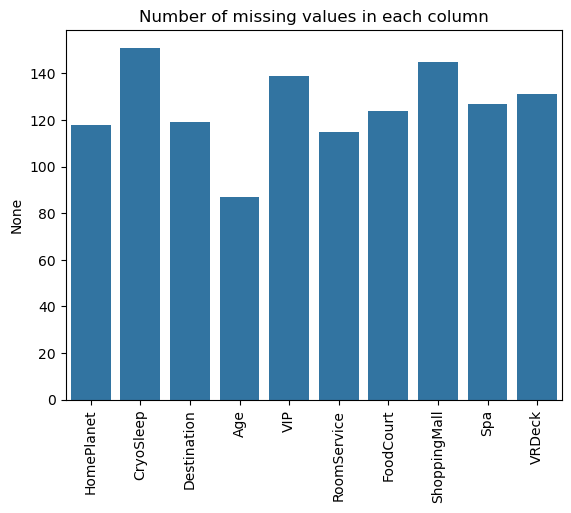

In [516]:
sns.barplot(x=missing_col, y=df_shp[missing_col].isna().sum())

plt.title('Number of missing values in each column')
plt.xticks(rotation=90)
plt.show()

In [517]:
df_shp[num_cols].isna().sum()

Age              87
RoomService     115
FoodCourt       124
ShoppingMall    145
Spa             127
VRDeck          131
dtype: int64

In [518]:
df_shp[num_cols].isna().sum().sum()

729

In [519]:
len(df_shp)

6964

In [520]:
X_train, X_test, y_train, y_test = train_test_split(
    df_shp.iloc[:, :-1],
    df_shp.iloc[:, -1],
    test_size=0.3,
    random_state=42
)

X_train.shape, X_test.shape

((4874, 11), (2090, 11))

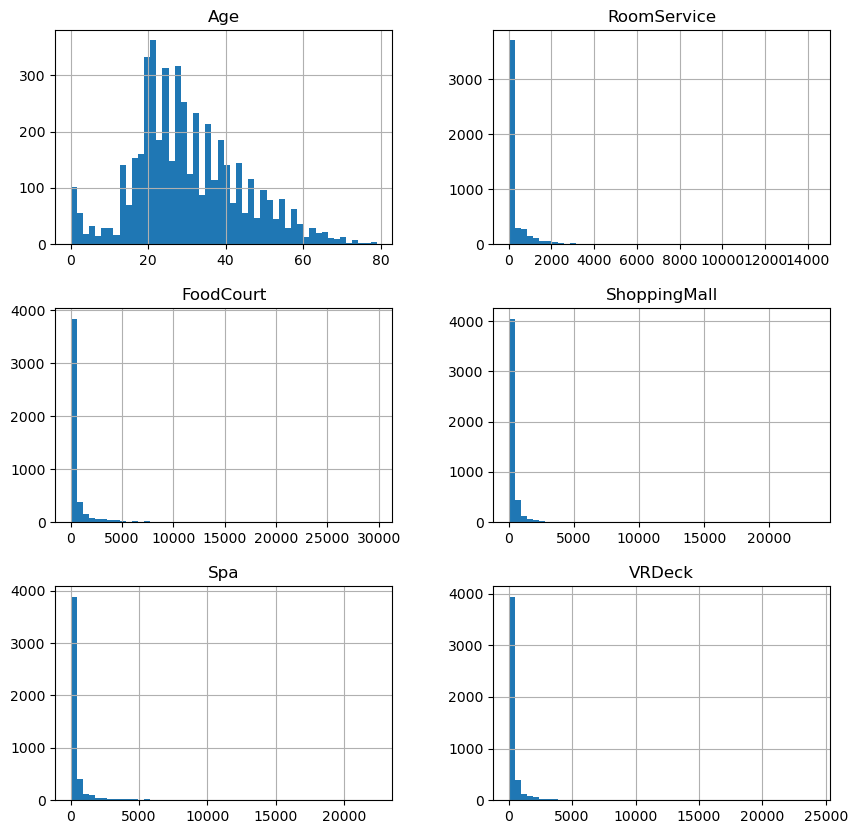

In [521]:
X_train.hist(bins=50, figsize=(10, 10));

FIll numerical missing values with Median because of skewed distribution:

In [522]:
imputer = MeanMedianImputer(
    imputation_method='median',
    variables=num_cols
)

imputer = imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

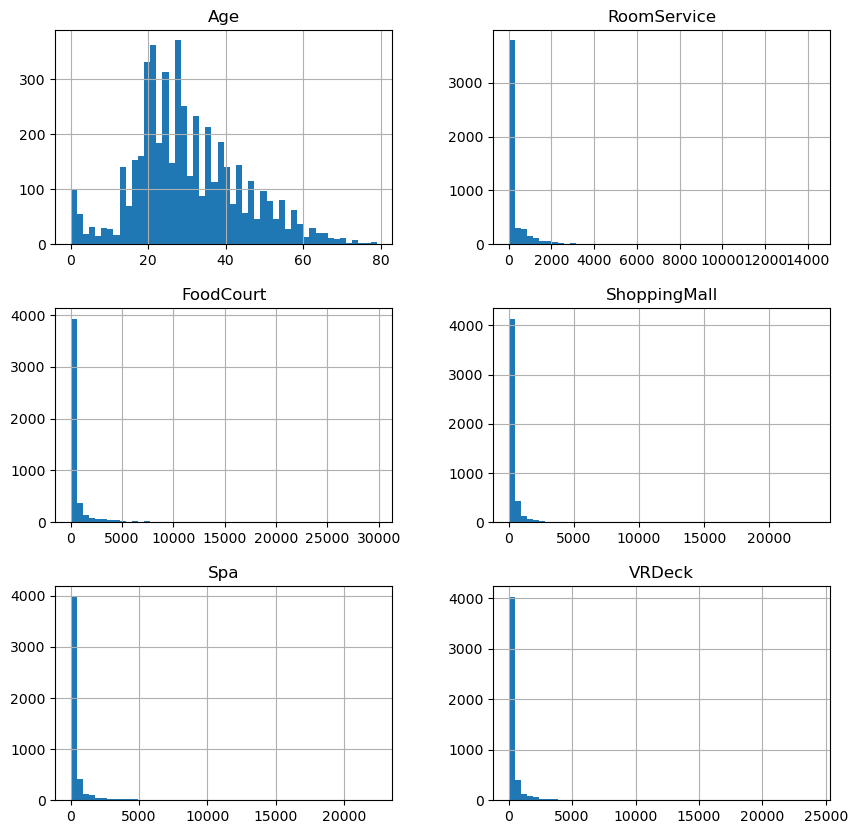

In [523]:
X_train.hist(bins=50, figsize=(10, 10));

In [524]:
X_train.isna().sum()

HomePlanet       85
CryoSleep       106
Cabin             0
Destination      81
Age               0
VIP              89
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
dtype: int64

In [525]:
X_train[cat_cols]

,HomePlanet,CryoSleep,Cabin,Destination,VIP
11766,Mars,False,E,TRAPPIST-1e,True
8648,Earth,False,F,TRAPPIST-1e,False
3098,Earth,True,G,PSO J318.5-22,False
47,Earth,False,F,TRAPPIST-1e,False
11222,Earth,False,F,TRAPPIST-1e,False
...,...,...,...,...,...
8597,Earth,False,G,TRAPPIST-1e,False
10175,Earth,False,E,TRAPPIST-1e,False
10214,Unknown,False,D,TRAPPIST-1e,False
10393,Mars,False,F,TRAPPIST-1e,False


Fill categorical missing values with arbitrary missing values

In [526]:
imputer = CategoricalImputer(
    imputation_method='missing',
    variables=cat_cols
)

imputer.fit(X_train)

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train[cat_cols].isna().sum()

HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
VIP            0
dtype: int64

In [527]:
X_train.isna().sum().sum()

0

In [528]:
X_test.isna().sum().sum()

0

In [529]:
X_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
11766,Mars,False,E,TRAPPIST-1e,27.0,True,3.0,952.0,208.0,951.0,0.0
8648,Earth,False,F,TRAPPIST-1e,28.0,False,0.0,26.0,88.0,5.0,754.0
3098,Earth,True,G,PSO J318.5-22,49.0,False,0.0,0.0,0.0,0.0,0.0
47,Earth,False,F,TRAPPIST-1e,24.0,False,0.0,0.0,0.0,0.0,17.0
11222,Earth,False,F,TRAPPIST-1e,21.0,False,0.0,70.0,2.0,0.0,486.0


Feature Encoding

In [530]:
cat_cols

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

In [531]:
for col in cat_cols:
    print(f"Value counts for {col}:")
    print(X_train[col].value_counts().sort_values(ascending=False))
    print('-'*50)

Value counts for HomePlanet:
HomePlanet
Earth      2555
Europa     1220
Mars        940
Missing      85
Unknown      74
Name: count, dtype: int64
--------------------------------------------------
Value counts for CryoSleep:
CryoSleep
False      3730
True        982
Missing     106
Unknown      56
Name: count, dtype: int64
--------------------------------------------------
Value counts for Cabin:
Cabin
F          1760
G          1059
E           600
C           419
B           382
D           328
A           162
n            82
Unknown      78
T             4
Name: count, dtype: int64
--------------------------------------------------
Value counts for Destination:
Destination
TRAPPIST-1e      3303
55 Cancri e      1001
PSO J318.5-22     422
Missing            81
Unknown            67
Name: count, dtype: int64
--------------------------------------------------
Value counts for VIP:
VIP
False      4583
True        139
Missing      89
Unknown      63
Name: count, dtype: int64
------------

In [532]:
# use label encoding
encoder = OrdinalEncoder(
    encoding_method='arbitrary'
)

encoder.fit(X_train)

X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)

X_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
11766,0,0,0,0,27.0,0,3.0,952.0,208.0,951.0,0.0
8648,1,0,1,0,28.0,1,0.0,26.0,88.0,5.0,754.0
3098,1,1,2,1,49.0,1,0.0,0.0,0.0,0.0,0.0
47,1,0,1,0,24.0,1,0.0,0.0,0.0,0.0,17.0
11222,1,0,1,0,21.0,1,0.0,70.0,2.0,0.0,486.0


In [533]:
y_train

11766    False
8648     False
3098      True
47        True
11222    False
         ...  
8597     False
10175    False
10214    False
10393    False
1068      True
Name: Transported, Length: 4874, dtype: bool

In [534]:
# convert from "True": 1, "False": 0
y_train = y_train.map({True: 1, False: 0})
y_test = y_test.map({True: 1, False: 0})

In [535]:
y_train

11766    0
8648     0
3098     1
47       1
11222    0
        ..
8597     0
10175    0
10214    0
10393    0
1068     1
Name: Transported, Length: 4874, dtype: int64

In [536]:
# combined into one dataframe
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
combined = pd.concat([train, test], axis=0, ignore_index=True)
combined

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0,0,0,0,27.0,0,3.0,952.0,208.0,951.0,0.0,0
1,1,0,1,0,28.0,1,0.0,26.0,88.0,5.0,754.0,0
2,1,1,2,1,49.0,1,0.0,0.0,0.0,0.0,0.0,1
3,1,0,1,0,24.0,1,0.0,0.0,0.0,0.0,17.0,1
4,1,0,1,0,21.0,1,0.0,70.0,2.0,0.0,486.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6959,1,2,8,0,36.0,1,0.0,3011.0,0.0,0.0,98.0,1
6960,2,0,3,0,27.0,1,0.0,144.0,76.0,184.0,3932.0,0
6961,0,0,0,0,53.0,1,868.0,0.0,686.0,520.0,24.0,0
6962,1,1,2,0,43.0,1,0.0,0.0,0.0,0.0,0.0,1


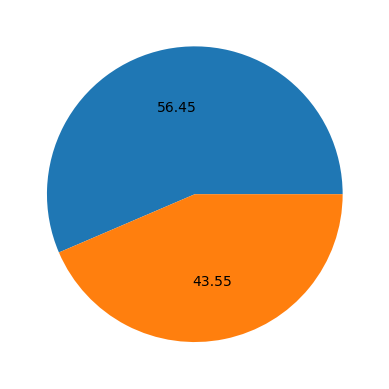

In [537]:
plt.pie(combined['Transported'].value_counts(), autopct='%.2f');

In [538]:
combined['Transported'].value_counts(normalize=True)

Transported
0    0.564474
1    0.435526
Name: proportion, dtype: float64

In [539]:
# Apply smote
from imblearn.over_sampling import SMOTE

X = combined.drop('Transported', axis=1)
y = combined['Transported']

smote = SMOTE(sampling_strategy='auto', random_state=0)
X_sm, y_sm = smote.fit_resample(X,y)

X_sm.shape, y_sm.shape

((7862, 11), (7862,))

In [540]:
combined_resampled = pd.concat([pd.DataFrame(X_sm), pd.DataFrame(y_sm, columns=['Transported'])], axis=1)

In [541]:
combined_resampled.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0,0,0,0,27.0,0,3.0,952.0,208.0,951.0,0.0,0
1,1,0,1,0,28.0,1,0.0,26.0,88.0,5.0,754.0,0
2,1,1,2,1,49.0,1,0.0,0.0,0.0,0.0,0.0,1
3,1,0,1,0,24.0,1,0.0,0.0,0.0,0.0,17.0,1
4,1,0,1,0,21.0,1,0.0,70.0,2.0,0.0,486.0,0


In [542]:
combined_resampled.Transported.value_counts(normalize=True)

Transported
0    0.5
1    0.5
Name: proportion, dtype: float64

In [543]:
combined_resampled.isna().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [544]:
combined_resampled.duplicated().sum()

479

In [545]:
# dropping duplicated rows
combined_resampled.drop_duplicates(inplace=True)
combined_resampled.duplicated().sum()

0

In [546]:
combined_resampled.Transported.value_counts(normalize=True)

Transported
0    0.528105
1    0.471895
Name: proportion, dtype: float64

In [547]:
# submit our clean data
combined_resampled.to_csv('clean_dataset/combined_resampled_shp.csv', index=False)

## 6. Data STP.csv

In [548]:
df_stp = pd.read_csv('dataset/STP.csv')
df_stp.head(10)

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3(Target),index
0,0,GP,F,NaN,U,GT3,A,4.0,-inf,at_home,...,NaN,4.0,1.0,1.0,3.0,4.0,0.0,11.0,11.0,0
1,1,GP,F,-,U,GT3,T,1.0,1.0,at_home,...,3.0,3.0,-,NaN,3.0,2.0,9.0,-inf,11.0,1
2,2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,...,NaN,2.0,2.0,NaN,NaN,6.0,12.0,13.0,12.0,2
3,3,GP,F,15.0,U,GT3,T,4.0,NaN,health,...,NaN,NaN,1.0,1.0,5.0,0.0,NaN,inf,NaN,3
4,4,GP,F,16.0,U,GT3,T,3.0,3.0,other,...,-inf,2.0,inf,2.0,5.0,0.0,NaN,13.0,13.0,4
5,5,GP,M,16.0,U,LE3,T,4.0,3.0,services,...,4.0,2.0,1.0,NaN,NaN,6.0,12.0,12.0,13.0,5
6,6,GP,M,-inf,U,LE3,T,2.0,2.0,other,...,4.0,4.0,1.0,1.0,3.0,0.0,13.0,12.0,13.0,6
7,7,GP,F,17.0,U,GT3,A,4.0,NaN,other,...,1.0,4.0,NaN,-,1.0,2.0,10.0,13.0,13.0,7
8,8,GP,M,15.0,U,LE3,A,NaN,-,services,...,2.0,2.0,1.0,1.0,inf,0.0,15.0,NaN,17.0,8
9,9,GP,M,15.0,U,GT3,T,NaN,4.0,other,...,5.0,1.0,inf,NaN,NaN,0.0,12.0,12.0,13.0,9


In [549]:
df_stp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1044 non-null   int64 
 1   school      1044 non-null   object
 2   sex         1044 non-null   object
 3   age         928 non-null    object
 4   address     1044 non-null   object
 5   famsize     1044 non-null   object
 6   Pstatus     1044 non-null   object
 7   Medu        919 non-null    object
 8   Fedu        928 non-null    object
 9   Mjob        1044 non-null   object
 10  Fjob        1044 non-null   object
 11  reason      1044 non-null   object
 12  guardian    1044 non-null   object
 13  traveltime  922 non-null    object
 14  studytime   920 non-null    object
 15  failures    922 non-null    object
 16  schoolsup   1044 non-null   object
 17  famsup      1044 non-null   object
 18  paid        1044 non-null   object
 19  activities  1044 non-null   object
 20  nursery 

**TODO**:
- Handle anomalies data
- Convert to corrected dtype
- Handle missing and duplicated data
- Encode categorical feature
- Feature scale (if needed) 

In [550]:
# replacing "-", "inf", "-inf" with 0 in categorical variables
cat_cols = [var for var in df_stp.columns if df_stp[var].dtypes == 'O']
for col in cat_cols:
    df_stp[col] = df_stp[col].replace({'-': '0', '-inf': '0', 'inf': '0'})

In [551]:
df_stp.head(10)

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3(Target),index
0,0,GP,F,NaN,U,GT3,A,4.0,0,at_home,...,NaN,4.0,1.0,1.0,3.0,4.0,0.0,11.0,11.0,0
1,1,GP,F,0,U,GT3,T,1.0,1.0,at_home,...,3.0,3.0,0,NaN,3.0,2.0,9.0,0,11.0,1
2,2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,...,NaN,2.0,2.0,NaN,NaN,6.0,12.0,13.0,12.0,2
3,3,GP,F,15.0,U,GT3,T,4.0,NaN,health,...,NaN,NaN,1.0,1.0,5.0,0.0,NaN,0,NaN,3
4,4,GP,F,16.0,U,GT3,T,3.0,3.0,other,...,0,2.0,0,2.0,5.0,0.0,NaN,13.0,13.0,4
5,5,GP,M,16.0,U,LE3,T,4.0,3.0,services,...,4.0,2.0,1.0,NaN,NaN,6.0,12.0,12.0,13.0,5
6,6,GP,M,0,U,LE3,T,2.0,2.0,other,...,4.0,4.0,1.0,1.0,3.0,0.0,13.0,12.0,13.0,6
7,7,GP,F,17.0,U,GT3,A,4.0,NaN,other,...,1.0,4.0,NaN,0,1.0,2.0,10.0,13.0,13.0,7
8,8,GP,M,15.0,U,LE3,A,NaN,0,services,...,2.0,2.0,1.0,1.0,0,0.0,15.0,NaN,17.0,8
9,9,GP,M,15.0,U,GT3,T,NaN,4.0,other,...,5.0,1.0,0,NaN,NaN,0.0,12.0,12.0,13.0,9


In [552]:
# convert to numeric cols
cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime'
        , 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3(Target)']

for col in cols:
    df_stp[col] = pd.to_numeric(df_stp[col])
df_stp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1044 non-null   int64  
 1   school      1044 non-null   object 
 2   sex         1044 non-null   object 
 3   age         928 non-null    float64
 4   address     1044 non-null   object 
 5   famsize     1044 non-null   object 
 6   Pstatus     1044 non-null   object 
 7   Medu        919 non-null    float64
 8   Fedu        928 non-null    float64
 9   Mjob        1044 non-null   object 
 10  Fjob        1044 non-null   object 
 11  reason      1044 non-null   object 
 12  guardian    1044 non-null   object 
 13  traveltime  922 non-null    float64
 14  studytime   920 non-null    float64
 15  failures    922 non-null    float64
 16  schoolsup   1044 non-null   object 
 17  famsup      1044 non-null   object 
 18  paid        1044 non-null   object 
 19  activities  1044 non-null  

Dropping unnecessary columns

In [553]:
df_stp.drop(['Unnamed: 0', 'index'], axis=1, inplace=True)
df_stp.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3(Target)
0,GP,F,NaN,U,GT3,A,4.0,0.0,at_home,teacher,...,4.0,NaN,4.0,1.0,1.0,3.0,4.0,0.0,11.0,11.0
1,GP,F,0.0,U,GT3,T,1.0,1.0,at_home,other,...,5.0,3.0,3.0,0.0,NaN,3.0,2.0,9.0,0.0,11.0
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,...,4.0,NaN,2.0,2.0,NaN,NaN,6.0,12.0,13.0,12.0
3,GP,F,15.0,U,GT3,T,4.0,NaN,health,services,...,3.0,NaN,NaN,1.0,1.0,5.0,0.0,NaN,0.0,NaN
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,...,4.0,0.0,2.0,0.0,2.0,5.0,0.0,NaN,13.0,13.0


In [554]:
check_data(df_stp)

There are 1918 missing values in the dataset.
There are 0 duplicated values in the dataset.


Handling missing values

In [555]:
df_stp.isna().sum().sort_values(ascending=False)

absences      127
Medu          125
Walc          124
studytime     124
health        123
famrel        122
failures      122
traveltime    122
G1            121
freetime      121
goout         117
age           116
Fedu          116
G3(Target)    114
Dalc          113
G2            111
higher          0
romantic        0
internet        0
school          0
nursery         0
activities      0
paid            0
sex             0
schoolsup       0
guardian        0
reason          0
Fjob            0
Mjob            0
Pstatus         0
famsize         0
address         0
famsup          0
dtype: int64

In [556]:
missing_cols = df_stp.columns[df_stp.isna().any()].tolist()
missing_cols

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3(Target)']

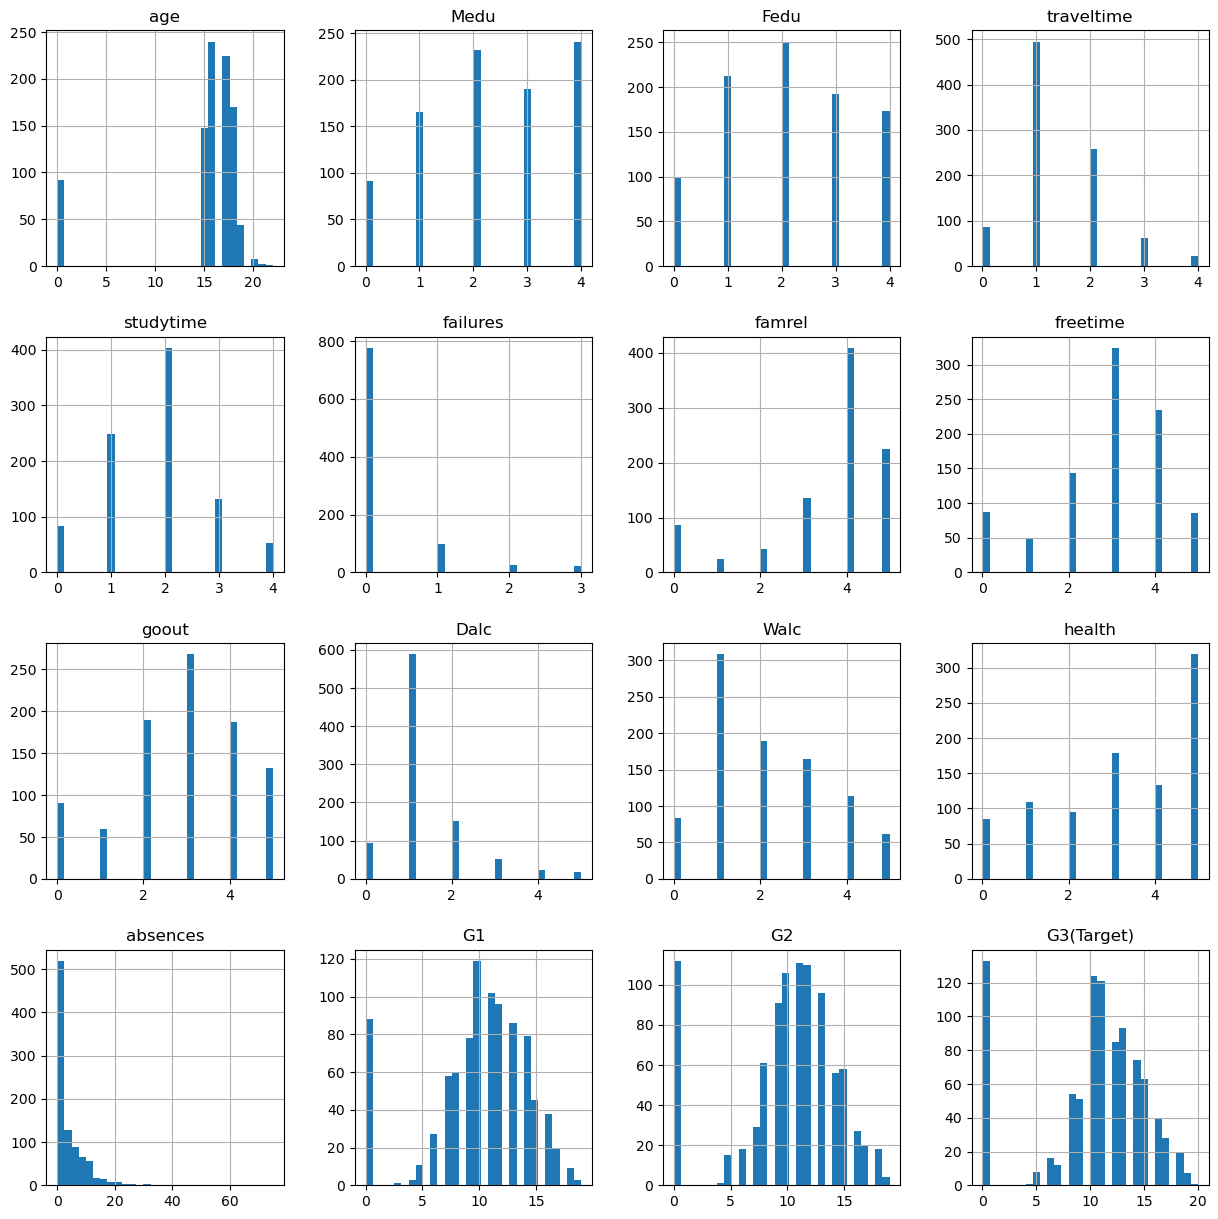

In [557]:
# print the histogram of all misisng columns in df_stp
df_stp[missing_cols].hist(bins=30, figsize=(15, 15))
plt.show()

In [558]:
X_train, X_test, y_train, y_test = train_test_split(
    df_stp.drop(['G3(Target)'], axis=1),
    df_stp['G3(Target)'],
    test_size=0.3,
    random_state=0
)

X_train.shape, X_test.shape

((730, 32), (314, 32))

In [559]:
# discrete so use median imputation
imputer = MeanMedianImputer(
    imputation_method='median',
)

imputer.fit(X_train)

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train[imputer.variables_].isna().sum()

age           0
Medu          0
Fedu          0
traveltime    0
studytime     0
failures      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
dtype: int64

In [560]:
X_train

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
830,GP,M,16.0,U,GT3,T,3.0,3.0,services,other,...,yes,4.0,2.0,3.0,1.0,2.0,3.0,2.0,12.0,0.0
172,GP,M,16.0,U,GT3,T,3.0,3.0,other,services,...,yes,4.0,5.0,5.0,4.0,4.0,5.0,0.0,10.0,10.0
1005,MS,F,17.0,R,GT3,T,4.0,4.0,teacher,services,...,no,4.0,0.0,3.0,1.0,2.0,0.0,4.0,11.0,13.0
1013,MS,F,0.0,R,GT3,T,1.0,2.0,other,services,...,no,0.0,2.0,2.0,1.0,2.0,4.0,0.0,12.0,11.0
397,GP,F,17.0,U,GT3,A,2.0,2.0,at_home,at_home,...,yes,3.0,3.0,1.0,1.0,2.0,0.0,18.0,10.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,MS,M,18.0,R,GT3,T,4.0,2.0,other,other,...,no,5.0,4.0,3.0,4.0,3.0,3.0,14.0,6.0,5.0
763,GP,M,15.0,R,GT3,T,2.0,2.0,health,services,...,yes,4.0,4.0,2.0,1.0,0.0,0.0,8.0,9.0,9.0
835,GP,M,16.0,U,GT3,T,1.0,2.0,services,services,...,yes,3.0,3.0,3.0,1.0,2.0,3.0,2.0,11.0,12.0
559,MS,M,18.0,R,GT3,T,2.0,0.0,at_home,at_home,...,no,4.0,3.0,2.0,1.0,0.0,4.0,0.0,12.0,12.0


In [561]:
# apply label encoding for `label_cols`
label_encoder = OrdinalEncoder(
    encoding_method='arbitrary',
)

label_encoder.fit(X_train)

X_train = label_encoder.transform(X_train)
X_test = label_encoder.transform(X_test)

In [562]:
X_train.isna().sum().sort_values(ascending=False)

school        0
sex           0
G1            0
absences      0
health        0
Walc          0
Dalc          0
goout         0
freetime      0
famrel        0
romantic      0
internet      0
higher        0
nursery       0
activities    0
paid          0
famsup        0
schoolsup     0
failures      0
studytime     0
traveltime    0
guardian      0
reason        0
Fjob          0
Mjob          0
Fedu          0
Medu          0
Pstatus       0
famsize       0
address       0
age           0
G2            0
dtype: int64

In [563]:
X_test.isna().sum().sort_values(ascending=False)

school        0
sex           0
G1            0
absences      0
health        0
Walc          0
Dalc          0
goout         0
freetime      0
famrel        0
romantic      0
internet      0
higher        0
nursery       0
activities    0
paid          0
famsup        0
schoolsup     0
failures      0
studytime     0
traveltime    0
guardian      0
reason        0
Fjob          0
Mjob          0
Fedu          0
Medu          0
Pstatus       0
famsize       0
address       0
age           0
G2            0
dtype: int64

In [564]:
# combine X_train and y_train 
train = pd.concat([X_train, y_train], axis=1)

# combine X_test and y_test
test = pd.concat([X_test, y_test], axis=1)

# combine train and test
combined_stp = pd.concat([train, test], axis=0)

In [565]:
combined_stp.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3(Target)
830,0,0,16.0,0,0,0,3.0,3.0,0,0,...,4.0,2.0,3.0,1.0,2.0,3.0,2.0,12.0,0.0,NaN
172,0,0,16.0,0,0,0,3.0,3.0,1,1,...,4.0,5.0,5.0,4.0,4.0,5.0,0.0,10.0,10.0,NaN
1005,1,1,17.0,1,0,0,4.0,4.0,2,1,...,4.0,0.0,3.0,1.0,2.0,0.0,4.0,11.0,13.0,13.0
1013,1,1,0.0,1,0,0,1.0,2.0,1,1,...,0.0,2.0,2.0,1.0,2.0,4.0,0.0,12.0,11.0,12.0
397,0,1,17.0,0,0,1,2.0,2.0,3,2,...,3.0,3.0,1.0,1.0,2.0,0.0,18.0,10.0,12.0,14.0


In [566]:
combined_stp.isna().sum().sort_values(ascending=False)

G3(Target)    114
paid            0
G2              0
G1              0
absences        0
health          0
Walc            0
Dalc            0
goout           0
freetime        0
famrel          0
romantic        0
internet        0
higher          0
nursery         0
activities      0
school          0
sex             0
schoolsup       0
failures        0
studytime       0
traveltime      0
guardian        0
reason          0
Fjob            0
Mjob            0
Fedu            0
Medu            0
Pstatus         0
famsize         0
address         0
age             0
famsup          0
dtype: int64

In [567]:
len(combined_stp)

1044

<Axes: >

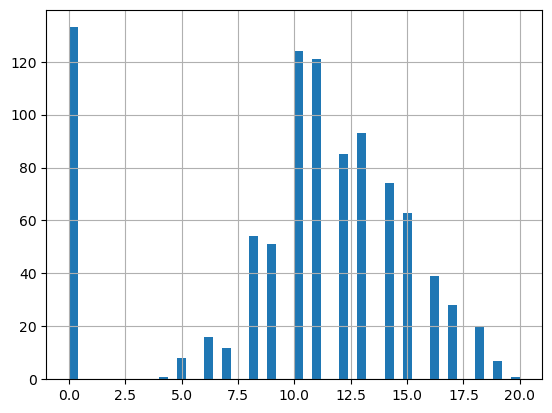

In [568]:
combined_stp['G3(Target)'].hist(bins=50)

<Axes: >

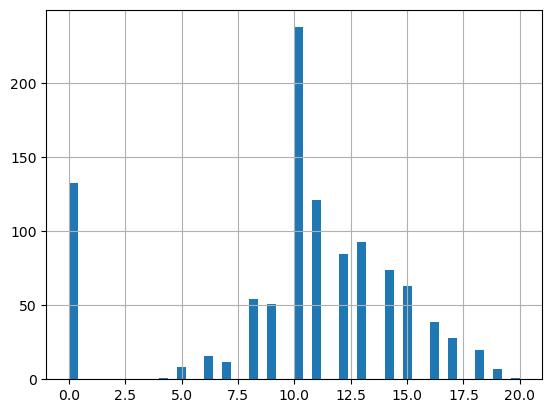

In [569]:
# fill with its mean
combined_stp['G3(Target)'] = combined_stp['G3(Target)'].fillna(combined_stp['G3(Target)'].mean())
combined_stp['G3(Target)'].hist(bins=50)

<Axes: ylabel='G3(Target)'>

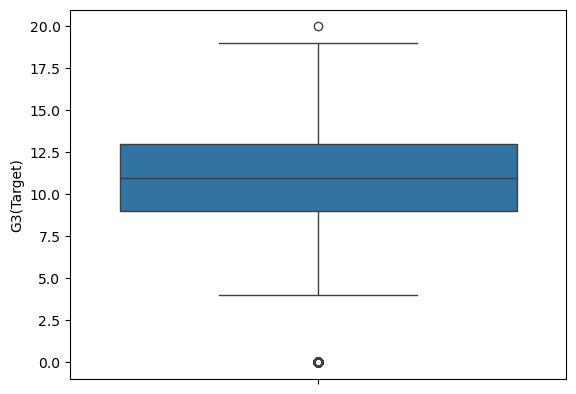

In [570]:
sns.boxplot(combined_stp['G3(Target)'])

In [571]:
# apply winsorization to G3(Target)
winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['G3(Target)'])


combined_stp = winsorizer.fit_transform(combined_stp)

<Axes: ylabel='G3(Target)'>

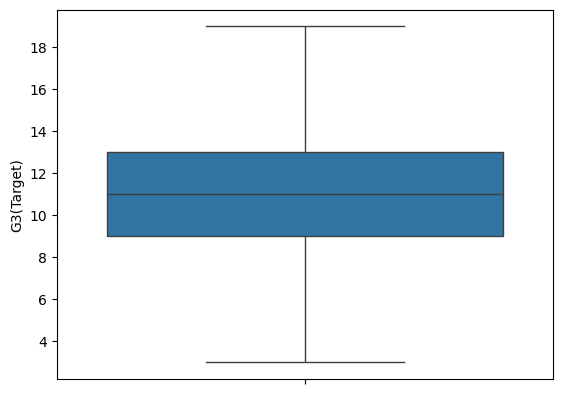

In [572]:
sns.boxplot(combined_stp['G3(Target)'])

<Axes: >

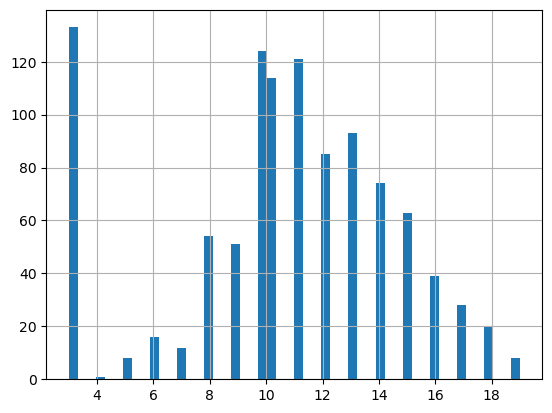

In [573]:
combined_stp['G3(Target)'].hist(bins=50)

In [574]:
combined_stp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 830 to 422
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      1044 non-null   int64  
 1   sex         1044 non-null   int64  
 2   age         1044 non-null   float64
 3   address     1044 non-null   int64  
 4   famsize     1044 non-null   int64  
 5   Pstatus     1044 non-null   int64  
 6   Medu        1044 non-null   float64
 7   Fedu        1044 non-null   float64
 8   Mjob        1044 non-null   int64  
 9   Fjob        1044 non-null   int64  
 10  reason      1044 non-null   int64  
 11  guardian    1044 non-null   int64  
 12  traveltime  1044 non-null   float64
 13  studytime   1044 non-null   float64
 14  failures    1044 non-null   float64
 15  schoolsup   1044 non-null   int64  
 16  famsup      1044 non-null   int64  
 17  paid        1044 non-null   int64  
 18  activities  1044 non-null   int64  
 19  nursery     1044 non-null   int

In [575]:
# submit our dataframe
combined_stp.to_csv("clean_dataset/clean_stp.csv", index=False)

## 6. Data SPY.csv

**TODO**:
- Handle anomalies data
- Convert to corrected dtype
- Handle missing and duplicated data
- Encode categorical feature
- Feature scale (if needed) 

In [576]:
df_spy = pd.read_csv("dataset/SPY.csv")
df_spy.head()

,Unnamed: 0,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",-,0.0
1,1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1.0
2,2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0.0
3,3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0.0
4,4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223",...,1,NaN,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1.0


In [577]:
# drop unneccessary column
df_spy = df_spy.drop(['Unnamed: 0', 'Album Name',
                      'Track', 'ISRC', 'TIDAL Popularity'], axis=1)
df_spy.head()

,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
0,Tommy Richman,4/26/2024,1,725.4,"390,470,936","30,716","196,631,588",92.0,"84,274,754","1,713,126",...,"40,975",684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",0.0
1,Kendrick Lamar,5/4/2024,2,545.9,"323,703,884","28,113","174,597,137",92.0,"116,347,040","3,486,739",...,"40,778",3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",1.0
2,Artemas,3/19/2024,3,538.4,"601,309,283","54,331","211,607,669",92.0,"122,599,116","2,228,730",...,"74,333",536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",0.0
3,Miley Cyrus,1/12/2023,4,444.9,"2,031,280,633","269,802","136,569,078",NaN,"1,096,100,899","10,629,796",...,"1,474,799","2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",0.0
4,Eminem,5/31/2024,5,423.3,"107,034,922","7,223","151,469,874",88.0,"77,373,957","3,670,188",...,"12,185",1,NaN,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",1.0


In [578]:
df_spy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6873 entries, 0 to 6872
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Artist                      6870 non-null   object 
 1   Release Date                6873 non-null   object 
 2   All Time Rank               6873 non-null   object 
 3   Track Score                 6089 non-null   object 
 4   Spotify Streams             6781 non-null   object 
 5   Spotify Playlist Count      6817 non-null   object 
 6   Spotify Playlist Reach      6808 non-null   object 
 7   Spotify Popularity          5501 non-null   object 
 8   YouTube Views               6602 non-null   object 
 9   YouTube Likes               6590 non-null   object 
 10  TikTok Posts                5861 non-null   object 
 11  TikTok Likes                6034 non-null   object 
 12  TikTok Views                5991 non-null   object 
 13  YouTube Playlist Reach      5998 

Convert to corrected dtypes

In [579]:
# convert release date into "year-month-day" format
df_spy['Release Date'] = pd.to_datetime(df_spy['Release Date'])

df_spy['Release Date']

0      2024-04-26
1      2024-05-04
2      2024-03-19
3      2023-01-12
4      2024-05-31
          ...    
6868   2015-09-04
6869   2023-10-26
6870   2022-11-25
6871   2019-06-14
6872   2019-03-29
Name: Release Date, Length: 6873, dtype: datetime64[ns]

In [580]:
df_spy.columns

Index(['Artist', 'Release Date', 'All Time Rank', 'Track Score',
       'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'Explicit Track'],
      dtype='object')

In [581]:
# replacing "-", "inf", "-inf" with 0 in categorical variables
cat_cols = [var for var in df_spy.columns if df_spy[var].dtypes == 'O']
for col in cat_cols:
    df_spy[col] = df_spy[col].replace({'-': '0', '-inf': '0', 'inf': '0'})

In [582]:
df_spy.head()

,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
0,Tommy Richman,2024-04-26,1,725.4,"390,470,936","30,716","196,631,588",92.0,"84,274,754","1,713,126",...,"40,975",684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",0.0
1,Kendrick Lamar,2024-05-04,2,545.9,"323,703,884","28,113","174,597,137",92.0,"116,347,040","3,486,739",...,"40,778",3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",1.0
2,Artemas,2024-03-19,3,538.4,"601,309,283","54,331","211,607,669",92.0,"122,599,116","2,228,730",...,"74,333",536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",0.0
3,Miley Cyrus,2023-01-12,4,444.9,"2,031,280,633","269,802","136,569,078",NaN,"1,096,100,899","10,629,796",...,"1,474,799","2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",0.0
4,Eminem,2024-05-31,5,423.3,"107,034,922","7,223","151,469,874",88.0,"77,373,957","3,670,188",...,"12,185",1,NaN,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",1.0


In [583]:
# removing commas 
col = ['Spotify Streams', 'Spotify Playlist Count',
       'Spotify Playlist Reach', 'YouTube Views',
       'YouTube Likes', 'TikTok Posts', 'TikTok Likes',
       'TikTok Views', 'YouTube Playlist Reach', 'AirPlay Spins',
       'Deezer Playlist Reach', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts']

for col in col:
    df_spy[col] = df_spy[col].str.replace(',', '').astype('float64')

df_spy.head()

,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
0,Tommy Richman,2024-04-26,1,725.4,3.904709e+08,30716.0,196631588.0,92.0,8.427475e+07,1713126.0,...,40975.0,684,62.0,17598718.0,114.0,18004655.0,22931.0,4818457.0,2669262.0,0.0
1,Kendrick Lamar,2024-05-04,2,545.9,3.237039e+08,28113.0,174597137.0,92.0,1.163470e+08,3486739.0,...,40778.0,3,67.0,10422430.0,111.0,7780028.0,28444.0,6623075.0,1118279.0,1.0
2,Artemas,2024-03-19,3,538.4,6.013093e+08,54331.0,211607669.0,92.0,1.225991e+08,2228730.0,...,74333.0,536,136.0,36321847.0,172.0,5022621.0,5639.0,7208651.0,5285340.0,0.0
3,Miley Cyrus,2023-01-12,4,444.9,2.031281e+09,269802.0,136569078.0,NaN,1.096101e+09,10629796.0,...,1474799.0,"2,182",264.0,24684248.0,210.0,190260277.0,203384.0,NaN,11822942.0,0.0
4,Eminem,2024-05-31,5,423.3,1.070349e+08,7223.0,151469874.0,88.0,7.737396e+07,3670188.0,...,12185.0,1,NaN,17660624.0,105.0,4493884.0,7006.0,207179.0,457017.0,1.0


In [584]:
df_spy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6873 entries, 0 to 6872
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Artist                      6870 non-null   object        
 1   Release Date                6873 non-null   datetime64[ns]
 2   All Time Rank               6873 non-null   object        
 3   Track Score                 6089 non-null   object        
 4   Spotify Streams             6781 non-null   float64       
 5   Spotify Playlist Count      6817 non-null   float64       
 6   Spotify Playlist Reach      6808 non-null   float64       
 7   Spotify Popularity          5501 non-null   object        
 8   YouTube Views               6602 non-null   float64       
 9   YouTube Likes               6590 non-null   float64       
 10  TikTok Posts                5861 non-null   float64       
 11  TikTok Likes                6034 non-null   float64     

In [585]:
num_cols = ['All Time Rank', 'Spotify Popularity', 'Apple Music Playlist Count',
           'Deezer Playlist Count', 'Amazon Playlist Count', 'Track Score', 'SiriusXM Spins']

# remove commas and set to float
for col in num_cols:
    df_spy[col] = df_spy[col].str.replace(',', '').astype('float64')

In [586]:
df_spy.head()

,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
0,Tommy Richman,2024-04-26,1.0,725.4,3.904709e+08,30716.0,196631588.0,92.0,8.427475e+07,1713126.0,...,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,4818457.0,2669262.0,0.0
1,Kendrick Lamar,2024-05-04,2.0,545.9,3.237039e+08,28113.0,174597137.0,92.0,1.163470e+08,3486739.0,...,40778.0,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,6623075.0,1118279.0,1.0
2,Artemas,2024-03-19,3.0,538.4,6.013093e+08,54331.0,211607669.0,92.0,1.225991e+08,2228730.0,...,74333.0,536.0,136.0,36321847.0,172.0,5022621.0,5639.0,7208651.0,5285340.0,0.0
3,Miley Cyrus,2023-01-12,4.0,444.9,2.031281e+09,269802.0,136569078.0,NaN,1.096101e+09,10629796.0,...,1474799.0,2182.0,264.0,24684248.0,210.0,190260277.0,203384.0,NaN,11822942.0,0.0
4,Eminem,2024-05-31,5.0,423.3,1.070349e+08,7223.0,151469874.0,88.0,7.737396e+07,3670188.0,...,12185.0,1.0,NaN,17660624.0,105.0,4493884.0,7006.0,207179.0,457017.0,1.0


In [587]:
df_spy['Explicit Track'] = df_spy['Explicit Track'].astype('int64')
df_spy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6873 entries, 0 to 6872
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Artist                      6870 non-null   object        
 1   Release Date                6873 non-null   datetime64[ns]
 2   All Time Rank               6873 non-null   float64       
 3   Track Score                 6089 non-null   float64       
 4   Spotify Streams             6781 non-null   float64       
 5   Spotify Playlist Count      6817 non-null   float64       
 6   Spotify Playlist Reach      6808 non-null   float64       
 7   Spotify Popularity          5501 non-null   float64       
 8   YouTube Views               6602 non-null   float64       
 9   YouTube Likes               6590 non-null   float64       
 10  TikTok Posts                5861 non-null   float64       
 11  TikTok Likes                6034 non-null   float64     

In [588]:
df_spy.head(2)

,Artist,Release Date,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
0,Tommy Richman,2024-04-26,1.0,725.4,390470936.0,30716.0,196631588.0,92.0,84274754.0,1713126.0,...,40975.0,684.0,62.0,17598718.0,114.0,18004655.0,22931.0,4818457.0,2669262.0,0
1,Kendrick Lamar,2024-05-04,2.0,545.9,323703884.0,28113.0,174597137.0,92.0,116347040.0,3486739.0,...,40778.0,3.0,67.0,10422430.0,111.0,7780028.0,28444.0,6623075.0,1118279.0,1


In [589]:
# extract date time into new features

df_spy['release_year'] = df_spy['Release Date'].dt.year
df_spy['release_month'] = df_spy['Release Date'].dt.month
df_spy['release_day'] = df_spy['Release Date'].dt.day
df_spy.drop('Release Date', axis=1, inplace=True)

df_spy.head()

,Artist,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,...,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track,release_year,release_month,release_day
0,Tommy Richman,1.0,725.4,3.904709e+08,30716.0,196631588.0,92.0,8.427475e+07,1713126.0,5767700.0,...,17598718.0,114.0,18004655.0,22931.0,4818457.0,2669262.0,0,2024,4,26
1,Kendrick Lamar,2.0,545.9,3.237039e+08,28113.0,174597137.0,92.0,1.163470e+08,3486739.0,674700.0,...,10422430.0,111.0,7780028.0,28444.0,6623075.0,1118279.0,1,2024,5,4
2,Artemas,3.0,538.4,6.013093e+08,54331.0,211607669.0,92.0,1.225991e+08,2228730.0,3025400.0,...,36321847.0,172.0,5022621.0,5639.0,7208651.0,5285340.0,0,2024,3,19
3,Miley Cyrus,4.0,444.9,2.031281e+09,269802.0,136569078.0,NaN,1.096101e+09,10629796.0,7189811.0,...,24684248.0,210.0,190260277.0,203384.0,NaN,11822942.0,0,2023,1,12
4,Eminem,5.0,423.3,1.070349e+08,7223.0,151469874.0,88.0,7.737396e+07,3670188.0,16400.0,...,17660624.0,105.0,4493884.0,7006.0,207179.0,457017.0,1,2024,5,31


In [590]:
df_spy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6873 entries, 0 to 6872
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Artist                      6870 non-null   object 
 1   All Time Rank               6873 non-null   float64
 2   Track Score                 6089 non-null   float64
 3   Spotify Streams             6781 non-null   float64
 4   Spotify Playlist Count      6817 non-null   float64
 5   Spotify Playlist Reach      6808 non-null   float64
 6   Spotify Popularity          5501 non-null   float64
 7   YouTube Views               6602 non-null   float64
 8   YouTube Likes               6590 non-null   float64
 9   TikTok Posts                5861 non-null   float64
 10  TikTok Likes                6034 non-null   float64
 11  TikTok Views                5991 non-null   float64
 12  YouTube Playlist Reach      5998 non-null   float64
 13  Apple Music Playlist Count  5671 

In [591]:
df_spy.isna().sum().sort_values(ascending=False)

Soundcloud Streams            2894
SiriusXM Spins                1835
Amazon Playlist Count         1532
Deezer Playlist Count         1450
Spotify Popularity            1372
Apple Music Playlist Count    1202
Pandora Track Stations        1105
TikTok Posts                  1012
Pandora Streams                956
TikTok Views                   882
YouTube Playlist Reach         875
TikTok Likes                   839
Deezer Playlist Reach          792
Track Score                    784
Shazam Counts                  510
AirPlay Spins                  418
YouTube Likes                  283
YouTube Views                  271
Spotify Streams                 92
Spotify Playlist Reach          65
Spotify Playlist Count          56
Artist                           3
All Time Rank                    0
Explicit Track                   0
release_year                     0
release_month                    0
release_day                      0
dtype: int64

In [592]:
df_spy.isna().sum().sort_values(ascending=False)

Soundcloud Streams            2894
SiriusXM Spins                1835
Amazon Playlist Count         1532
Deezer Playlist Count         1450
Spotify Popularity            1372
Apple Music Playlist Count    1202
Pandora Track Stations        1105
TikTok Posts                  1012
Pandora Streams                956
TikTok Views                   882
YouTube Playlist Reach         875
TikTok Likes                   839
Deezer Playlist Reach          792
Track Score                    784
Shazam Counts                  510
AirPlay Spins                  418
YouTube Likes                  283
YouTube Views                  271
Spotify Streams                 92
Spotify Playlist Reach          65
Spotify Playlist Count          56
Artist                           3
All Time Rank                    0
Explicit Track                   0
release_year                     0
release_month                    0
release_day                      0
dtype: int64

In [593]:
df_spy.columns

Index(['Artist', 'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'Explicit Track', 'release_year',
       'release_month', 'release_day'],
      dtype='object')

In [594]:
# drop artist with missing values
df_spy = df_spy.dropna(subset=['Artist'])

In [595]:
# fill missing values with -1

df_spy = df_spy.fillna(-1)

In [596]:
X_train, X_test, y_train, y_test = train_test_split(
    df_spy.drop('Explicit Track', axis=1),
    df_spy['Explicit Track'],
    test_size=0.3,
    random_state=0
)

X_train.shape, X_test.shape

((4809, 26), (2061, 26))

In [597]:
# apply label encoding to artist
encoder = OrdinalEncoder(
    variables=['Artist'],
    encoding_method='arbitrary',
    unseen='ignore'
)

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

X_test

,Artist,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,...,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,release_year,release_month,release_day
4577,NaN,4538.0,19.500000,5.832094e+08,66332.0,17627488.0,71.000000,561013544.0,4030692.0,56188.0,...,18.000000,54106.0,14.0,2659814.0,6481.0,0.0,1385244.0,2018,3,2
5284,1387.0,1718.0,35.307052,1.102913e+08,39905.0,6175231.0,52.020583,32448901.0,528302.0,3800778.0,...,4.994361,9091.0,-1.0,3946559.0,3976.0,-1.0,2290647.0,2021,10,7
319,129.0,319.0,85.600000,1.615274e+09,203617.0,35375009.0,79.000000,515463883.0,6471385.0,59900.0,...,14.000000,176966.0,5.0,106473506.0,116371.0,319835943.0,2026025.0,2017,8,25
6158,1338.0,849.0,52.809913,1.232762e+08,8330.0,3632731.0,-1.000000,208302578.0,1903455.0,0.0,...,-1.000000,-1.0,-1.0,-1.0,0.0,-1.0,146801.0,2023,11,18
287,254.0,288.0,-1.000000,8.394056e+08,107431.0,27444811.0,75.000000,662287768.0,4695932.0,3874773.0,...,-1.000000,1780823.0,46.0,8328637.0,7361.0,0.0,2351019.0,2022,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,588.0,472.0,70.600000,8.580593e+08,181654.0,27803039.0,70.000000,464768581.0,3626173.0,732132.0,...,16.000000,326481.0,15.0,102388116.0,214657.0,144090448.0,2592470.0,2019,2,7
1791,667.0,1781.0,34.500000,8.615210e+05,374.0,206771.0,14.000000,273898.0,2095.0,6140453.0,...,-1.000000,-1.0,0.0,-1.0,28.0,-1.0,215105.0,2021,6,22
3612,167.0,3591.0,22.700000,5.588636e+06,1252.0,7389987.0,-1.000000,5680064.0,87918.0,0.0,...,-1.000000,1369715.0,18.0,4153458.0,165.0,534597.0,32511.0,2024,5,3
3062,402.0,3057.0,-1.000000,4.594352e+07,11657.0,5242498.0,0.000000,42010424.0,494545.0,2149.0,...,6.000000,4285.0,9.0,3543329.0,3321.0,0.0,143251.0,2023,12,1


In [598]:
X_train.head()

,Artist,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,...,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,release_year,release_month,release_day
2386,0,2377.0,29.2,8.535749e+08,46385.0,17500223.0,73.0,867818629.0,6416562.0,1097599.0,...,-1.0,-1.0,1.0,-1.0,0.0,0.0,-1.0,2018,10,25
1150,1,1144.0,0.0,8.226968e+08,141261.0,26970098.0,0.0,587804570.0,5432716.0,806169.0,...,117.0,1507919.0,27.0,131125635.0,26028.0,10568592.0,6782620.0,2019,6,13
3055,2,3052.0,25.1,7.557782e+07,19796.0,1372880.0,-1.0,143710823.0,3896344.0,373432.0,...,1.0,645.0,-1.0,582712.0,20261.0,2272774.0,234259.0,2022,11,4
3328,3,3302.0,-1.0,1.285243e+09,216338.0,88471248.0,77.0,256379013.0,2156909.0,265724.0,...,98.0,1410983.0,65.0,283521080.0,769916.0,-1.0,8551662.0,2008,1,1
3649,4,3639.0,22.5,2.285888e+08,55077.0,5070531.0,63.0,526305086.0,5736409.0,2331929.0,...,-1.0,15135.0,4.0,197001.0,1063.0,0.0,4386468.0,2018,1,1


In [599]:
# apply stabndard scaler and convert to dataframe

scaler = StandardScaler()

X_train_scale = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scale = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train_scale.shape, X_test.shape

((4809, 26), (2061, 26))

In [600]:
X_train.head()

,Artist,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,...,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,release_year,release_month,release_day
2386,0,2377.0,29.2,8.535749e+08,46385.0,17500223.0,73.0,867818629.0,6416562.0,1097599.0,...,-1.0,-1.0,1.0,-1.0,0.0,0.0,-1.0,2018,10,25
1150,1,1144.0,0.0,8.226968e+08,141261.0,26970098.0,0.0,587804570.0,5432716.0,806169.0,...,117.0,1507919.0,27.0,131125635.0,26028.0,10568592.0,6782620.0,2019,6,13
3055,2,3052.0,25.1,7.557782e+07,19796.0,1372880.0,-1.0,143710823.0,3896344.0,373432.0,...,1.0,645.0,-1.0,582712.0,20261.0,2272774.0,234259.0,2022,11,4
3328,3,3302.0,-1.0,1.285243e+09,216338.0,88471248.0,77.0,256379013.0,2156909.0,265724.0,...,98.0,1410983.0,65.0,283521080.0,769916.0,-1.0,8551662.0,2008,1,1
3649,4,3639.0,22.5,2.285888e+08,55077.0,5070531.0,63.0,526305086.0,5736409.0,2331929.0,...,-1.0,15135.0,4.0,197001.0,1063.0,0.0,4386468.0,2018,1,1


In [601]:
# combine X_train and y_train
train = pd.concat([X_train, y_train], axis=1)

# combine X_test and y_test
test = pd.concat([X_test, y_test], axis=1)

# combine train and test
combined_spy = pd.concat([train, test], axis=0)

In [602]:
combined_spy

,Artist,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,...,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,release_year,release_month,release_day,Explicit Track
2386,0.0,2377.0,29.2,8.535749e+08,46385.0,17500223.0,73.0,867818629.0,6416562.0,1097599.0,...,-1.0,1.0,-1.0,0.0,0.0,-1.0,2018,10,25,0
1150,1.0,1144.0,0.0,8.226968e+08,141261.0,26970098.0,0.0,587804570.0,5432716.0,806169.0,...,1507919.0,27.0,131125635.0,26028.0,10568592.0,6782620.0,2019,6,13,0
3055,2.0,3052.0,25.1,7.557782e+07,19796.0,1372880.0,-1.0,143710823.0,3896344.0,373432.0,...,645.0,-1.0,582712.0,20261.0,2272774.0,234259.0,2022,11,4,0
3328,3.0,3302.0,-1.0,1.285243e+09,216338.0,88471248.0,77.0,256379013.0,2156909.0,265724.0,...,1410983.0,65.0,283521080.0,769916.0,-1.0,8551662.0,2008,1,1,0
3649,4.0,3639.0,22.5,2.285888e+08,55077.0,5070531.0,63.0,526305086.0,5736409.0,2331929.0,...,15135.0,4.0,197001.0,1063.0,0.0,4386468.0,2018,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,588.0,472.0,70.6,8.580593e+08,181654.0,27803039.0,70.0,464768581.0,3626173.0,732132.0,...,326481.0,15.0,102388116.0,214657.0,144090448.0,2592470.0,2019,2,7,1
1791,667.0,1781.0,34.5,8.615210e+05,374.0,206771.0,14.0,273898.0,2095.0,6140453.0,...,-1.0,0.0,-1.0,28.0,-1.0,215105.0,2021,6,22,0
3612,167.0,3591.0,22.7,5.588636e+06,1252.0,7389987.0,-1.0,5680064.0,87918.0,0.0,...,1369715.0,18.0,4153458.0,165.0,534597.0,32511.0,2024,5,3,1
3062,402.0,3057.0,-1.0,4.594352e+07,11657.0,5242498.0,0.0,42010424.0,494545.0,2149.0,...,4285.0,9.0,3543329.0,3321.0,0.0,143251.0,2023,12,1,1


In [603]:
combined_spy['Explicit Track'].value_counts()

Explicit Track
0    4830
1    2040
Name: count, dtype: int64

In [604]:
combined_spy.isna().sum()

Artist                        361
All Time Rank                   0
Track Score                     0
Spotify Streams                 0
Spotify Playlist Count          0
Spotify Playlist Reach          0
Spotify Popularity              0
YouTube Views                   0
YouTube Likes                   0
TikTok Posts                    0
TikTok Likes                    0
TikTok Views                    0
YouTube Playlist Reach          0
Apple Music Playlist Count      0
AirPlay Spins                   0
SiriusXM Spins                  0
Deezer Playlist Count           0
Deezer Playlist Reach           0
Amazon Playlist Count           0
Pandora Streams                 0
Pandora Track Stations          0
Soundcloud Streams              0
Shazam Counts                   0
release_year                    0
release_month                   0
release_day                     0
Explicit Track                  0
dtype: int64

In [605]:
# drop artist with missing values
combined_spy = combined_spy.dropna(subset=['Artist'])
combined_spy.isna().sum()

Artist                        0
All Time Rank                 0
Track Score                   0
Spotify Streams               0
Spotify Playlist Count        0
Spotify Playlist Reach        0
Spotify Popularity            0
YouTube Views                 0
YouTube Likes                 0
TikTok Posts                  0
TikTok Likes                  0
TikTok Views                  0
YouTube Playlist Reach        0
Apple Music Playlist Count    0
AirPlay Spins                 0
SiriusXM Spins                0
Deezer Playlist Count         0
Deezer Playlist Reach         0
Amazon Playlist Count         0
Pandora Streams               0
Pandora Track Stations        0
Soundcloud Streams            0
Shazam Counts                 0
release_year                  0
release_month                 0
release_day                   0
Explicit Track                0
dtype: int64

In [606]:
# apply smote
from imblearn.over_sampling import SMOTE

X = combined_spy.drop('Explicit Track', axis=1)
y = combined_spy['Explicit Track']

smote = SMOTE(sampling_strategy='minority', random_state=0)
X_sm, y_sm = smote.fit_resample(X,y)

X_sm.shape, y_sm.shape

((9108, 26), (9108,))

In [607]:
# combine X_sm and y_sm
combined_spy = pd.concat([X_sm, y_sm], axis=1)
combined_spy

,Artist,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,...,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,release_year,release_month,release_day,Explicit Track
0,0.000000,2377.000000,29.200000,8.535749e+08,46385.000000,1.750022e+07,73.000000,8.678186e+08,6.416562e+06,1.097599e+06,...,-1.000000e+00,1.000000,-1.000000e+00,0.000000,0.000000e+00,-1.000000e+00,2018,10,25,0
1,1.000000,1144.000000,0.000000,8.226968e+08,141261.000000,2.697010e+07,0.000000,5.878046e+08,5.432716e+06,8.061690e+05,...,1.507919e+06,27.000000,1.311256e+08,26028.000000,1.056859e+07,6.782620e+06,2019,6,13,0
2,2.000000,3052.000000,25.100000,7.557782e+07,19796.000000,1.372880e+06,-1.000000,1.437108e+08,3.896344e+06,3.734320e+05,...,6.450000e+02,-1.000000,5.827120e+05,20261.000000,2.272774e+06,2.342590e+05,2022,11,4,0
3,3.000000,3302.000000,-1.000000,1.285243e+09,216338.000000,8.847125e+07,77.000000,2.563790e+08,2.156909e+06,2.657240e+05,...,1.410983e+06,65.000000,2.835211e+08,769916.000000,-1.000000e+00,8.551662e+06,2008,1,1,0
4,4.000000,3639.000000,22.500000,2.285888e+08,55077.000000,5.070531e+06,63.000000,5.263051e+08,5.736409e+06,2.331929e+06,...,1.513500e+04,4.000000,1.970010e+05,1063.000000,0.000000e+00,4.386468e+06,2018,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9103,1037.054895,1234.057569,10.151182,3.818476e+08,56372.138779,1.007870e+07,52.195003,1.286419e+08,1.502225e+06,5.579655e+06,...,6.724297e+04,17.356537,7.354107e+07,33814.426418,0.000000e+00,1.948920e+06,2020,4,8,1
9104,212.710712,3989.772191,21.293242,2.551227e+08,32030.366961,1.333467e+07,54.613515,3.599615e+08,1.902605e+06,6.937390e+04,...,4.655026e+04,23.904328,4.425976e+07,9601.961328,-6.772969e-01,7.538863e+05,2020,4,9,1
9105,114.791958,1522.688486,28.300765,9.245887e+08,116930.882778,3.015109e+07,70.480004,3.693105e+08,5.819665e+06,9.729008e+05,...,1.044231e+05,10.624017,6.672744e+07,41525.724435,4.220316e+07,2.839370e+06,2018,5,14,1
9106,633.200732,1123.858844,39.176352,6.184663e+07,5504.421650,6.379427e+07,78.659028,2.748228e+07,1.763379e+05,-1.136572e-01,...,2.950245e+06,14.454629,9.550791e+05,326.951420,1.464670e+04,2.564314e+05,2024,3,12,1


In [608]:
check_data(combined_spy)

There are 0 missing values in the dataset.
There are 21 duplicated values in the dataset.


In [609]:
combined_spy.drop_duplicates(inplace=True)

In [610]:
check_data(combined_spy)

There are 0 missing values in the dataset.
There are 0 duplicated values in the dataset.


In [611]:
combined_spy['Explicit Track'].value_counts()

Explicit Track
0    4553
1    4534
Name: count, dtype: int64

In [612]:
# submit to our dataframe
combined_spy.to_csv('clean_dataset/clean_spy.csv', index=False)

## 8. Data MBP.csv

In [620]:
df_mbp = pd.read_csv('dataset/MBP.csv')
df_mbp.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17


In [621]:
df_mbp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1836 non-null   object 
 1   Rating ?/5         1836 non-null   float64
 2   Number of Ratings  1836 non-null   object 
 3   RAM                1836 non-null   object 
 4   ROM/Storage        1662 non-null   object 
 5   Back/Rare Camera   1827 non-null   object 
 6   Front Camera       1435 non-null   object 
 7   Battery            1826 non-null   object 
 8   Processor          1781 non-null   object 
 9   Price in INR       1836 non-null   object 
 10  Date of Scraping   1836 non-null   object 
dtypes: float64(1), object(10)
memory usage: 157.9+ KB


In [622]:
cat_cols = [col for col in df_mbp.columns if df_mbp[col].dtypes == 'O']

for col in cat_cols:
    print(f"Value counts for {col}:")
    print(df_mbp[col].value_counts().sort_values(ascending=False))
    print('-'*50)

Value counts for Phone Name:
Phone Name
SAMSUNG Guru Music 2                               9
OnePlus 10R 5G (Sierra Black, 256 GB)              5
Nokia 6310                                         4
SAMSUNG Galaxy M33 5G (Deep Ocean Blue, 128 GB)    4
Nokia 105 PLUS                                     4
                                                  ..
Infinix Smart HD 2021 (Obsidian Black, 32 GB)      1
Infinix Note 11 (Graphite Black, 128 GB)           1
Infinix Note 11s (Mithril Grey, 64 GB)             1
Infinix Hot 11S (7° Purple, 64 GB)                 1
Infinix S5 (Quetzal Cyan, 64 GB)                   1
Name: count, Length: 1507, dtype: int64
--------------------------------------------------
Value counts for Number of Ratings:
Number of Ratings
0           25
36,349      16
10,895      14
2,24,309    13
682         11
            ..
6,800        1
11,594       1
82,838       1
6,42,389     1
15,701       1
Name: count, Length: 717, dtype: int64
----------------------------

In [623]:
check_data(df_mbp)

There are 649 missing values in the dataset.
There are 69 duplicated values in the dataset.


In [624]:
df_mbp.isna().sum().sort_values(ascending=False)

Front Camera         401
ROM/Storage          174
Processor             55
Battery               10
Back/Rare Camera       9
Phone Name             0
Rating ?/5             0
Number of Ratings      0
RAM                    0
Price in INR           0
Date of Scraping       0
dtype: int64

In [625]:
df_mbp.isna().sum().sort_values(ascending=False) / len(df_mbp)

Front Camera         0.218410
ROM/Storage          0.094771
Processor            0.029956
Battery              0.005447
Back/Rare Camera     0.004902
Phone Name           0.000000
Rating ?/5           0.000000
Number of Ratings    0.000000
RAM                  0.000000
Price in INR         0.000000
Date of Scraping     0.000000
dtype: float64

In [626]:
# CREATE A COLUMN NAMED "Price in Euro"
df_mbp["Price in INR"] = df_mbp["Price in INR"].str.replace("₹", "").str.replace(",", "")  # Remove "₹" and "," from the "Price in INR" column
df_mbp["Price in INR"] = df_mbp["Price in INR"].astype("int")  # Convert the "Price in INR" column to an integer

In [627]:
df_mbp.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5649,2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,11999,2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,6999,2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,7749,2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,6999,2023-06-17


In [628]:
# REMOVE "," FROM "Number of Ratings" COLUMN
df_mbp["Number of Ratings"] = df_mbp["Number of Ratings"].str.replace(",", "")

In [629]:
# CREATE A NEW COLUMN "BRAND" TO INDICATE THE MANUFACTURER BRAND OF THE PHONE
df_mbp['Phone Name'] = df_mbp['Phone Name'].astype(str)
df_mbp['Brand'] = df_mbp['Phone Name'].str.split().str[0]

In [630]:
df_mbp.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping,Brand
0,"POCO C50 (Royal Blue, 32 GB)",4.2,33561,2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5649,2023-06-17,POCO
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,77128,4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,11999,2023-06-17,POCO
2,"POCO C51 (Royal Blue, 64 GB)",4.3,15175,4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,6999,2023-06-17,POCO
3,"POCO C55 (Cool Blue, 64 GB)",4.2,22621,4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,7749,2023-06-17,POCO
4,"POCO C51 (Power Black, 64 GB)",4.3,15175,4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,6999,2023-06-17,POCO


In [632]:
df_mbp['Brand'].value_counts()

Brand
SAMSUNG     240
realme      233
vivo        216
Nokia       144
APPLE       134
POCO        120
OnePlus     120
Infinix     120
OPPO        120
Redmi       104
MOTOROLA     78
Mi           45
Xiaomi       28
Lenovo       24
Alcatel      24
Google       17
REDMI        12
Huawei       11
Apple        10
Moto          8
Realme        7
Motorola      6
Nothing       5
Nexus         3
A10E          2
a             2
�9A           2
10A           1
Name: count, dtype: int64

In [635]:
df_mbp['Brand'] = df_mbp['Brand'].replace({"APPLE": "Apple", "apple": "Apple",
                                   "Nexus": "Google",
                                   "realme": "Realme",
                                   "vivo": "Vivo",
                                   "SAMSUNG": "Samsung",
                                   "10A": "Samsung",
                                   "Mi": "Xiaomi",
                                   "MOTOROLA": "Motorola",
                                   "Moto": "Motorola",
                                   "A10E": "Samsung",
                                   "a": "Samsung",
                                   "�9A": "Samsung",
                                   "10A": "Samsung"})

In [636]:
df_mbp['Brand'].value_counts()

Brand
Samsung     247
Realme      240
Vivo        216
Apple       144
Nokia       144
POCO        120
OnePlus     120
Infinix     120
OPPO        120
Redmi       104
Motorola     92
Xiaomi       73
Alcatel      24
Lenovo       24
Google       20
REDMI        12
Huawei       11
Nothing       5
Name: count, dtype: int64

In [637]:
df_mbp.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping,Brand
0,"POCO C50 (Royal Blue, 32 GB)",4.2,33561,2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5649,2023-06-17,POCO
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,77128,4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,11999,2023-06-17,POCO
2,"POCO C51 (Royal Blue, 64 GB)",4.3,15175,4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,6999,2023-06-17,POCO
3,"POCO C55 (Cool Blue, 64 GB)",4.2,22621,4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,7749,2023-06-17,POCO
4,"POCO C51 (Power Black, 64 GB)",4.3,15175,4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,6999,2023-06-17,POCO


In [638]:
def move_ROM_from_RAM(row):
    if row['RAM'] is not None and row['RAM'].endswith("ROM"):
        row['ROM/Storage'] = row['RAM']
        row['RAM'] = None
    return row

df_mbp = df_mbp.apply(move_ROM_from_RAM, axis=1)
print(df_mbp.columns)

# I'M REMOVING "RAM" WORD FROM THE "RAM" COLUMN
df_mbp['RAM'] = df_mbp['RAM'].fillna('None').apply(lambda x: x.replace('RAM', ''))

# FORMULA TO CONVERT VALUES EXPRESSED IN MEGABYTES (MB) AND GIGABYTES (GB) INTO NUMERICAL VALUES WITH A REFERENCE SIZE OF 1 GB:
mb_to_gb = {
    "MB": 0.001,
    "GB": 1
}

def convert_ram_to_gb(ram_value):
    value, unit = ram_value.split()
    return float(value) * mb_to_gb[unit]

def check_ram_value(value):
    valid_values = ['MB', 'GB']
    for valid_value in valid_values:
        if valid_value in value:
            return value
    return None

df_mbp['RAM'] = df_mbp['RAM'].apply(check_ram_value)

# I'M REMOVING UNWANTED STRINGS
unwanted_strings = ['Expandable Upto 16 GB', 'Expandable Upto 2 GB']
df_mbp['RAM'] = df_mbp['RAM'].apply(lambda x: None if x in unwanted_strings else x)
df_mbp.dropna(subset=['RAM'], inplace=True)

# THIS CODE CREATES A NEW COLUMN 'RAM GB' THAT CONTAINS VALUES FROM THE 'RAM' COLUMN CONVERTED INTO NUMERICAL VALUES (EXPRESSED IN GB)
df_mbp['RAM GB'] = df_mbp['RAM'].apply(convert_ram_to_gb)
df_mbp.drop(columns=['RAM'], inplace=True)

Index(['Phone Name', 'Rating ?/5', 'Number of Ratings', 'RAM', 'ROM/Storage',
       'Back/Rare Camera', 'Front Camera', 'Battery', 'Processor',
       'Price in INR', 'Date of Scraping', 'Brand'],
      dtype='object')


In [639]:
df_mbp.head()

,Phone Name,Rating ?/5,Number of Ratings,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping,Brand,RAM GB
0,"POCO C50 (Royal Blue, 32 GB)",4.2,33561,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5649,2023-06-17,POCO,2.0
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,77128,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,11999,2023-06-17,POCO,4.0
2,"POCO C51 (Royal Blue, 64 GB)",4.3,15175,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,6999,2023-06-17,POCO,4.0
3,"POCO C55 (Cool Blue, 64 GB)",4.2,22621,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,7749,2023-06-17,POCO,4.0
4,"POCO C51 (Power Black, 64 GB)",4.3,15175,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,6999,2023-06-17,POCO,4.0


In [640]:
# remving "rom" from the "ROM/Storage" column
df_mbp['ROM/Storage'] = df_mbp['ROM/Storage'].fillna('None').apply(lambda x: x.replace('ROM', ''))

# FORMULA TO CONVERT VALUES EXPRESSED IN MEGABYTES (MB) AND GIGABYTES (GB) INTO NUMERICAL VALUES WITH A REFERENCE SIZE OF 1 GB:
convertion = {
    "MB": 0.001,
    "GB": 1,
    "TB": 1000
}
